## Lending Club case study

### The objective is to identify the driving factors behind loan defaults

This can be acheived by EDA of the loan dataset we have.

We are going to follow the below steps:
    1. To understand the dataset, the columns and rows are provided
    2. To clean the dataset and keep data that is relevant to this analysis, drop rows and columns if needed, impute values where needed etc.
    3. To find the values and distribution of those values for a column
    4. To derive, if needed, columns from existing columns that will help in the analysis.
    5. To analyse - driving factors for loan defaulting.

In [1]:
#Import all Libraries needed for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Importing file loan.csv

In [2]:
#Read the data from csv to dataframe
loan = pd.read_csv('C:\\Users\\saifr\\Documents\\Python Data files\\loan.csv',encoding='UTF-8')

We can see that the loan.csv file is in UTF-8 file format

In [3]:
#To display all columns in the dataframe
pd.set_option('display.max_columns', None)
loan.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Data cleaning 

In [4]:
# Let's have a look at the shape of the dataframe
print(loan.shape)

(39717, 111)


In [5]:
#Let's check how many rows have all null values
print(loan.isnull().all(axis=1).sum())

0


So we can see there are no rows in the dataframe where there are all null values

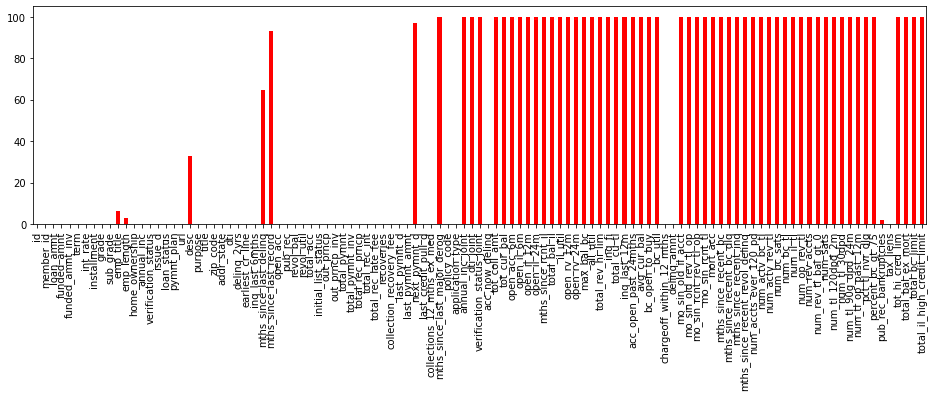

In [6]:
#Let's have a look at the null columns in the dataframe
plt.figure(figsize=[16,4])
((loan.isnull().sum()/len(loan))*100).plot.bar(color='red')
plt.show()

In [7]:
# We can see there are a lot of null columns that have no data at all. We do not need these for our analysis
# Dropping columns having no data
loan.dropna(axis=1,how='all',inplace=True)

In [8]:
# Let's have a look at the shape of the dataframe after null column drop
loan.shape

(39717, 57)

Our analysis for this one is to understand the pattern for loan defaulters and potential customers. For this analysis we are going to drop all the columns that do not give any insight to our analysis or are not relevant to our analysis

In [9]:
# Now looking at the data we can see there are columns that are not relevant to our analysis - insights for defaulter pattern or potential customer to business. Some columns also have large numbers of null values and adds nothing to our analysis
# We will remove those columns so that we can focus on our analysis with the columns that we need for this analysis.
loan.drop(['acc_now_delinq','delinq_2yrs','earliest_cr_line','inq_last_6mths','application_type','open_acc','pub_rec','revol_bal','revol_util'],axis=1,inplace=True)
loan.drop(['total_rec_int','pymnt_plan','initial_list_status','total_rec_late_fee','recoveries','collection_recovery_fee','tax_liens','collections_12_mths_ex_med','chargeoff_within_12_mths','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1,inplace=True)
loan.drop(['policy_code','total_pymnt_inv','total_rec_prncp','total_acc','out_prncp','out_prncp_inv','total_pymnt','member_id','url','zip_code','desc','delinq_amnt','mths_since_last_delinq','emp_title','next_pymnt_d','title'],axis=1,inplace=True)
# A lot of these columns are customer behavioral and they have no direct relation for loan defaulting. Thus, we are dropping them as well.

In [10]:
#Lets have a look at the shape
loan.shape

(39717, 20)

In [11]:
#In this dataframe, we can see ID is the unique identification number for each of the customers. Thus, we are going to treat it as a categorical variable
loan.id = loan.id.astype('object')

In [12]:
# Lets have a look at the dataframe now
loan.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,NaN,0.0


In [13]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_record,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,2786.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,69.698134,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,43.822529,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,22.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,90.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,104.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,129.000000,2.000000


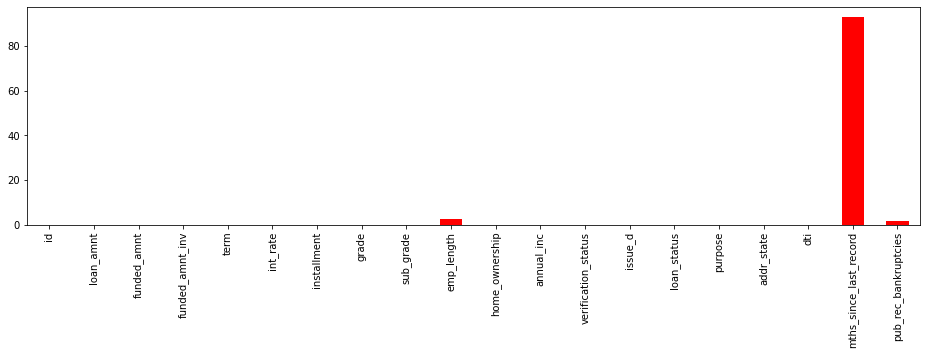

In [14]:
# Let's now have a look at the null value for the dataframe
plt.figure(figsize=[16,4])
((loan.isnull().sum()/len(loan))*100).plot.bar(color='red')
plt.show()

We can see there are a large number of null values for the column 'mths_since_last_record'. We can check for the different values that the column have

In [15]:
#Values for mths_since_last_record
loan.mths_since_last_record.value_counts().head(6)

0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
94.0      55
Name: mths_since_last_record, dtype: int64

So we can impute this column with the '0.0'  since that is the most common value in the column. Also, converting the column to float for calculations.

In [16]:
loan.mths_since_last_record = loan.mths_since_last_record.fillna('0.0')

In [17]:
loan.mths_since_last_record = loan.mths_since_last_record.astype('float64')

The next column that has null values is the emp_length. Lets have a look at the distinct values

In [18]:
#Values in emp_length
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [19]:
#Imputing null values with 'No data' for employee length column
loan.emp_length = loan.emp_length.fillna('No data')

The next column that has null values is the pub_rec_bankruptcies. Let's have a look at the distinct values

In [20]:
#Values in pub_rec_bankruptcies
loan.pub_rec_bankruptcies.value_counts().head(6)

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [21]:
#Since there are a lot of 0.0 values in the column we can impute the null values with this value
loan.pub_rec_bankruptcies = loan.pub_rec_bankruptcies.fillna('0.0')
loan.pub_rec_bankruptcies = loan.pub_rec_bankruptcies.astype('float64')

Our primary focus is to understand the loan defaulter parameters. In the given dataset, lets have a look at the different loan status that we have 

In [22]:
#Lets see what are the different loan status there in the file and how much are they( in percentage)
round(loan['loan_status'].value_counts()/len(loan['loan_status'])*100,2)

Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: loan_status, dtype: float64

For our analysis we need to find insights for 'Fully Paid' and 'Charged off' loans to understand the pattern for defaulters. So we are going to drop the 'Current' loans that are currently active which accounts to 2.8% of the total dataset. 

In [23]:
#Dropping rows for 'Current' loan status 
loan = loan[loan.loan_status != 'Current']

In [24]:
#Converting interest rate to float value to find insights
loan.int_rate = loan.int_rate.str.replace('%','',regex=True)
loan.int_rate = loan.int_rate.astype('float64')

In [25]:
#Deriving month and year from issue_d column
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['issue_year']=loan['issue_d'].dt.year
loan['issue_month']=loan['issue_d'].dt.month
loan.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_record,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,0.0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,0.0,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,0.0,2011,12


In [26]:
#Drop column issue_d
loan.drop(['issue_d'],axis=1,inplace=True)

Let's have a look at the spread of data using boxplot to understand data concentration and outliers

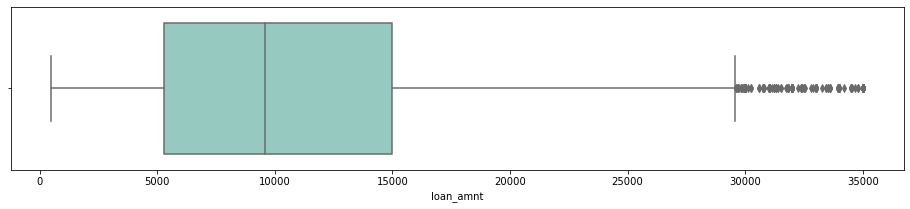

In [27]:
#Let's have a look at the loan amount distribution
plt.figure(figsize=[16,3])
sns.boxplot(loan['loan_amnt'],palette="Set3")
plt.show()

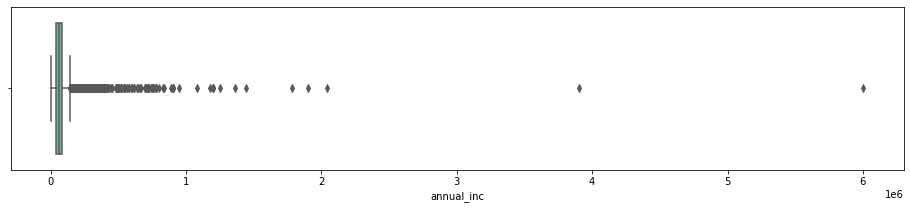

In [28]:
#Let's have a look at the annual income distribution
plt.figure(figsize=[16,3])
sns.boxplot(loan['annual_inc'],palette="Set2")
plt.show()

We can see some of the annual incomes are very high and are outliers

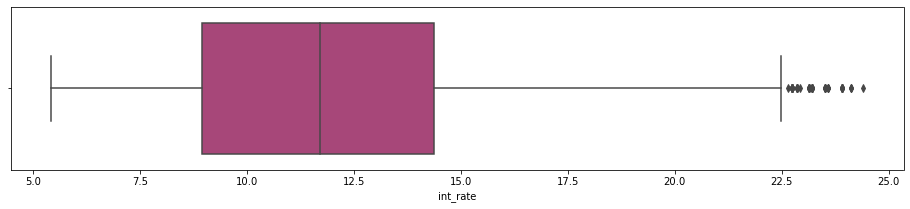

In [29]:
#Let's have a look at the interest rates distribution
plt.figure(figsize=[16,3])
sns.boxplot(loan['int_rate'],palette="magma")
plt.show()

Now that we have an idea on the loan amounts, annual incomes and interest rates using distribution diagram, lets have a look at the correlation between the columns of the dataframe

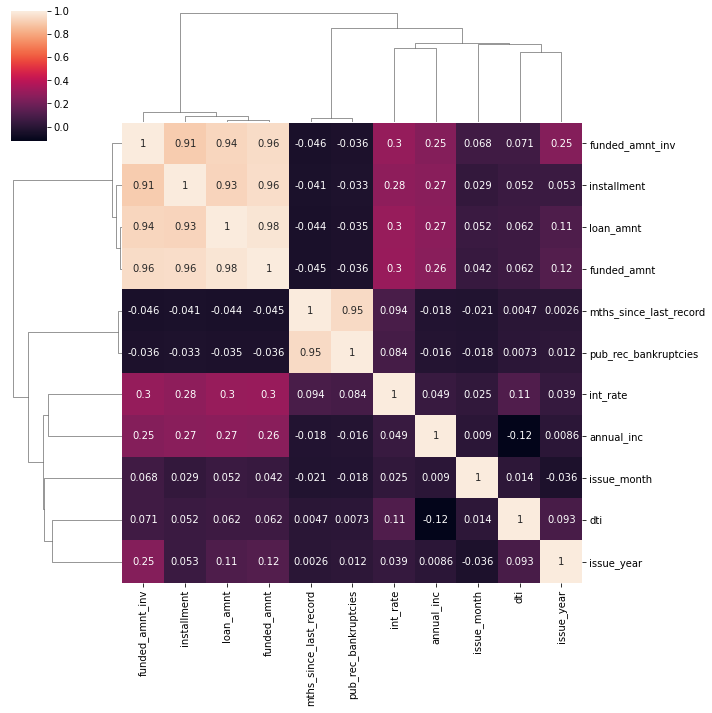

In [30]:
#Understanding correlation between the columns
loan_cor = loan.corr()
sns.clustermap(loan_cor,annot=True)

From the above correlation matrix, we can understand the following:
1. There is a strong correlation between Amount funded, Investor amount and Loan amount
2. The DTI(debt to income) and Annual income is negative correlated, meaning when one increases, the other decreases.

For our further analysis we are going to consider the Loan amount only and not the amount funded or investor amount

In [31]:
#Drop columns
loan.drop(['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

In [32]:
#Deriving columns that would help in our analysis
#Deriving categorical columns based on annual income of applicant
def annual_inc_cat(n):
    if n < 50000:
        return '0-50000'
    elif n >=50000 and n < 100000:
        return '50000-100000'
    elif n >= 100000 and n < 150000:
        return '100000-150000'
    else:
        return '150000+'
    
loan['annual_inc_cat'] = loan['annual_inc'].apply(lambda x: annual_inc_cat(x))

In [33]:
loan.annual_inc_cat.value_counts()

50000-100000     18238
0-50000          14360
100000-150000     4270
150000+           1709
Name: annual_inc_cat, dtype: int64

In [34]:
#Deriving categorical columns based on interest rate applied
def int_rate_cat(n):
    if n < 9.0:
        return '0-9.0'
    elif n >=9.0 and n < 13.0:
        return '9.0-13.0'
    elif n >= 13.0 and n < 16.0:
        return '13.0-16.0'
    elif n >= 16.0 and n < 20.0:
        return '16.0-20.0'
    else:
        return '20+'
    
loan['int_rate_cat'] = loan['int_rate'].apply(lambda x: int_rate_cat(x))

In [35]:
loan.int_rate_cat.value_counts()

9.0-13.0     14190
0-9.0         9808
13.0-16.0     9076
16.0-20.0     4733
20+            770
Name: int_rate_cat, dtype: int64

In [36]:
#Deriving categorical columns based on loan amount sanctioned
def loan_amnt_cat(n):
    if n < 5000:
        return '0-5000'
    elif n >=5000 and n < 10000:
        return '5000-10000'
    elif n >=10000 and n < 15000:
        return '10000-15000'
    elif n >= 15000 and n < 20000:
        return '15000-20000'
    elif n >= 20000 and n < 25000:
        return '20000-25000'
    else:
        return '25000+'
        
loan['loan_amnt_cat'] = loan['loan_amnt'].apply(lambda x: loan_amnt_cat(x))

In [37]:
#Deriving categorical columns based on debt to income ratio of the customer
def dti_cat(n):
    if n < 7:
        return '0-7'
    elif n >=7 and n < 15.0:
        return '7-15'
    elif n >= 15 and n < 20:
        return '15-20'
    elif n >= 20 and n < 25:
        return '20-25'
    else:
        return '25+'
        
loan['dti_cat'] = loan['dti'].apply(lambda x: dti_cat(x))

In [38]:
loan.dti_cat.value_counts()

7-15     14731
15-20     8824
0-7       7798
20-25     6599
25+        625
Name: dti_cat, dtype: int64

# Analysis:

Let's have a look at the various columns and find the relationship with other columns and draw graphs to understand the insights

We are going to find the most common loan categories that costomers have availed

In [39]:
# Finding the percentage of defaulters in the entire dataset
loan_status_1 = round((loan.groupby(by=['loan_status'])['id'].count()/len(loan))*100,1).reset_index()

In [40]:
loan_status_1

,loan_status,id
0,Charged Off,14.6
1,Fully Paid,85.4


We can see **14.6%** of the total dataset is loan defaulter

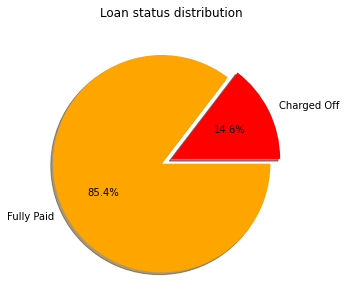

In [41]:
# Graph showing defaulter slice with respect to the paid loans in the database
plt.figure(figsize=[5,5])
colors = ['red', 'orange']
explode =(0,0.1) 
plt.pie(loan_status_1['id'],labels=loan_status_1['loan_status'],explode = explode, shadow=True, colors = colors,autopct='%1.1f%%')
plt.title('Loan status distribution')
plt.show()

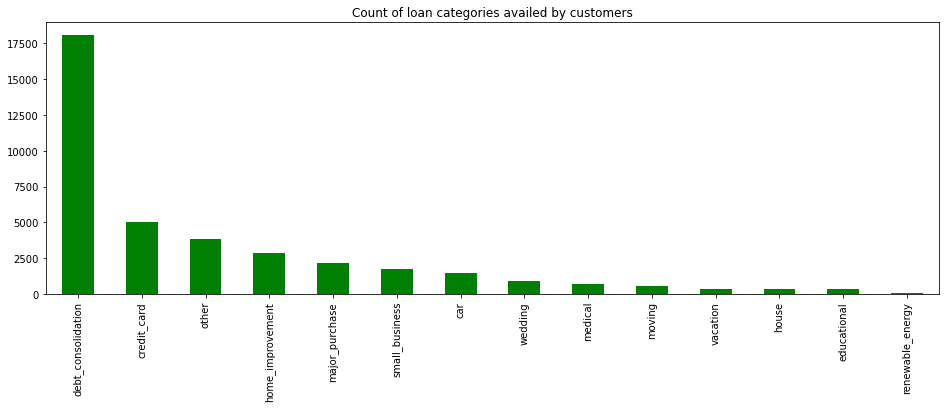

In [42]:
# Now let's have a look at the most categories of loans availed (purpose)
plt.figure(figsize=[16,5])
loan['purpose'].value_counts().plot.bar(color = 'green')
plt.title('Count of loan categories availed by customers')
plt.show()

There are a lot of categories that customers have availed loans for. For our analysis, we are going to consider the four most common types availed.
We can see in this graph the **top 4** categories customers have primarily taken the loan for are Debt consolidation, Credit Card, Other and Home improvement.

In [43]:
# Creating separate datasets having only the above four loan types to analyse further

In [44]:
# Creating dataset for Debt consolidation
DC = loan[loan['purpose'] == 'debt_consolidation']

In [45]:
# Creating dataset for Credit Card
CC = loan[loan['purpose'] == 'credit_card']

In [46]:
# Creating dataset for Other
OT = loan[loan['purpose'] == 'other']

In [47]:
# Creating dataset for Home improvement
HI = loan[loan['purpose'] == 'home_improvement']

Now we are going to look at each of these loans and try to understand the relation of different parameters for Paid and Default loans.

The parameters that we are going to look for are:
1. Loan amount
2. Loan Term
3. Interest rates
4. Grade, Sub-Grade
5. Employee length
6. Annual income
7. Debt to Income

#### Insights for loans applied for Debt Consolidation

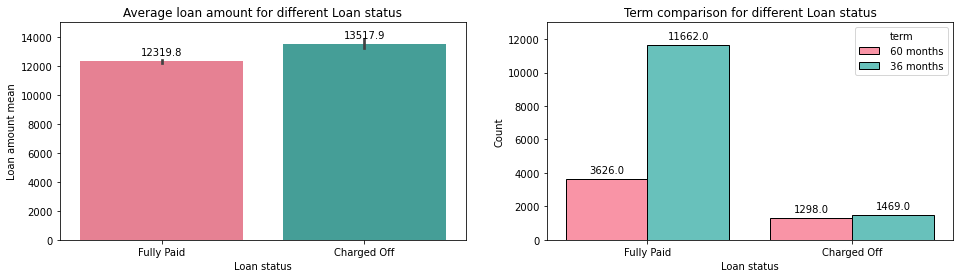

In [48]:
# Checking different parameters for Debt Consolidation
from numpy import mean
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
DC_LA = sns.barplot(y=DC['loan_amnt'],data=DC,estimator=mean,x=DC['loan_status'],palette='husl')
plt.title('Average loan amount for different Loan status')
plt.ylabel('Loan amount mean')
plt.xlabel('Loan status')
plt.ylim(0,15000)
for a in DC_LA.patches:
    DC_LA.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(1,2,2)
DC_LS = sns.histplot(data=DC,x=DC['loan_status'],hue=DC['term'],palette='husl',multiple='dodge',shrink=.8)
plt.title('Term comparison for different Loan status')
plt.ylabel('Count')
plt.xlabel('Loan status')
plt.ylim(0,13000)
for a in DC_LS.patches:
    DC_LS.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

From the above graph we can observe the following:
1. The average loan amounts for Default loans are higher than Paid. This implies that more the loan amount, the more is the chance of defaulting
2. The term of 60 months is more to default than the term for 36 months. It implies that longer loan is more likely to default than a shorter loan tenure

In [49]:
#Lets have a look at the percentage values for the defaulters
DC1 = DC.groupby(['term', 'loan_status'])['id'].agg('count')
DC1_pct = DC1.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

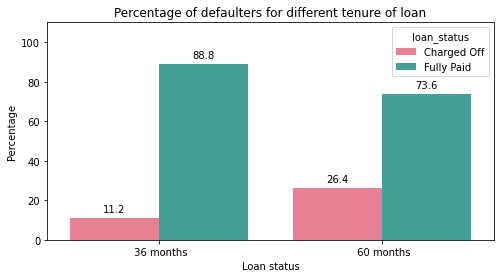

In [50]:
plt.figure(figsize=[8,4])
DC1_pct_sns = sns.barplot(x='term',y='percentage',data = DC1_pct,hue='loan_status',palette='husl')
plt.title('Percentage of defaulters for different tenure of loan')
plt.ylabel('Percentage')
plt.xlabel('Loan status')
plt.ylim(0,110)
for a in DC1_pct_sns.patches:
    DC1_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see there is a considerable difference for loan defaulting for longer loan period. Around **15.2%** difference is found between the 36 months and 60 months period for Debt Consolidation loan defaults. This means more the tenure, higher the chance of defaulting

We can observe that for Debt Consolidation loans, the mean amount is less for fully paid loans. This suggests that lower loan amounts are likely to get paid and higher amounts might get defaulted.

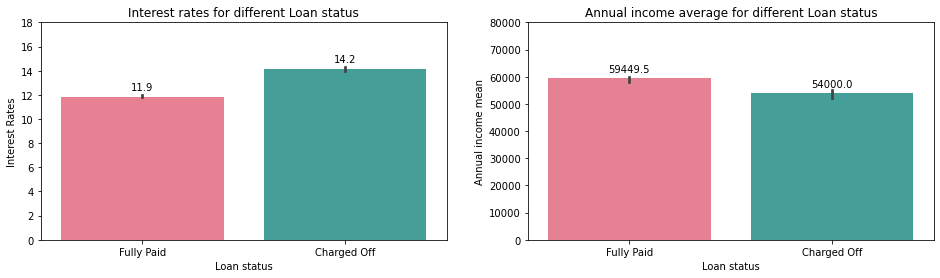

In [51]:
from numpy import median
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
DC_IR = sns.barplot(y=DC['int_rate'],data=DC,estimator=median,x=DC['loan_status'],palette='husl')
plt.title('Interest rates for different Loan status')
plt.ylabel('Interest Rates')
plt.xlabel('Loan status')
plt.ylim(0,18)
for a in DC_IR.patches:
    DC_IR.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(1,2,2)
DC_AI = sns.barplot(y=DC['annual_inc'],data=DC,estimator=median,x=DC['loan_status'],palette='husl')
plt.title('Annual income average for different Loan status')
plt.ylabel('Annual income mean')
plt.xlabel('Loan status')
plt.ylim(0,80000)
for a in DC_AI.patches:
    DC_AI.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

From the above graph we can observe the following:
1. The average interest rates for Default loans are higher than the ones that are paid. This means, lower the interest rates, the more the chances of paying back.
2. The lesser the annual income for a customer, the less likely they are to pay back the loans. In other words, more likely to be defaulters

The interest graph suggests that the lower the interest rates, the lesser are the defaults. It can also be considered that loans with interest rates less than 11% are very less likely to default considering the other parameters are also satisfying.

The annual income shows that more the annual salary of a consumer, the less likely they are to default. Also, annual income of customers for this loan category shows less default rates for income more than 59500.

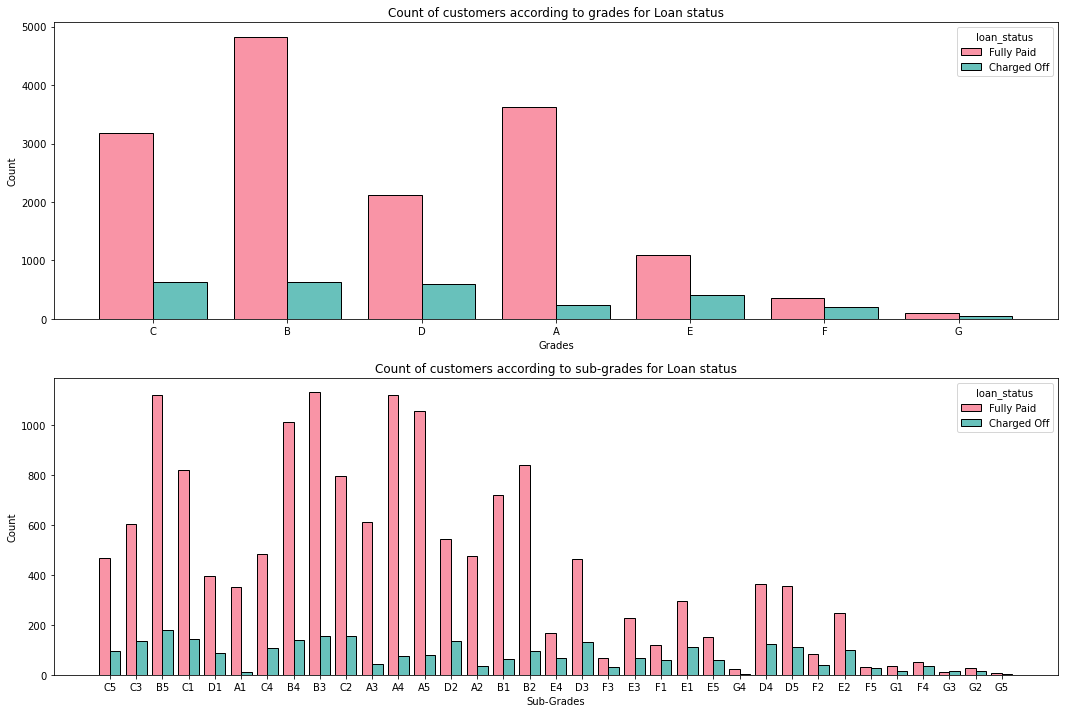

In [52]:
#Let's have a look at the grades and sub-grades 
plt.figure(figsize=[18,12])
plt.subplot(2,1,1)
sns.histplot(data=DC,x=DC['grade'],hue=DC['loan_status'],multiple='dodge',shrink=.8,palette='husl')
plt.title('Count of customers according to grades for Loan status')
plt.ylabel('Count')
plt.xlabel('Grades')

plt.subplot(2,1,2)
sns.histplot(data=DC,x=DC['sub_grade'],hue=DC['loan_status'],multiple='dodge',shrink=.8,palette='husl')
plt.title('Count of customers according to sub-grades for Loan status')
plt.ylabel('Count')
plt.xlabel('Sub-Grades')

plt.show()

In [53]:
#Lets find the relation of grades with loan defaulting
DC2 = DC.groupby(['grade', 'loan_status'])['id'].agg('count')
DC2_pct = DC2.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

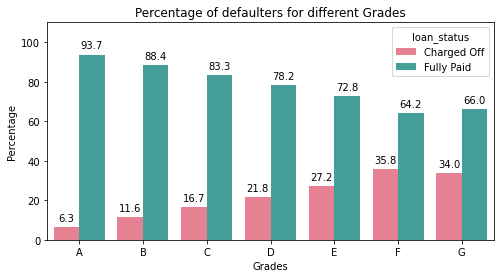

In [54]:
plt.figure(figsize=[8,4])
DC2_pct_sns = sns.barplot(x='grade',y='percentage',data = DC2_pct,hue='loan_status',palette='husl')
plt.title('Percentage of defaulters for different Grades')
plt.ylabel('Percentage')
plt.xlabel('Grades')
plt.ylim(0,110)
for a in DC2_pct_sns.patches:
    DC2_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see there is a relation between the grades and defaulting - A having the least defaulting percentage and F having the most. For a few grades like E,G the percentage of defaulting are very high as well. The difference in loan defaulters between grade A, the lowest defaulter, and F, the highest defaulter is around **29.5%**.

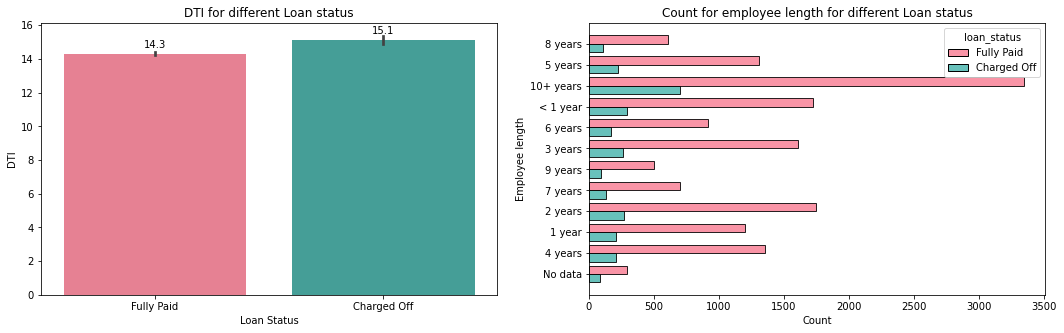

In [55]:
#Let's have a look at the DTI and Employee length
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
DC_DT = sns.barplot(y=DC['dti'],data=DC,estimator=mean,x=DC['loan_status'],palette='husl')
plt.title('DTI for different Loan status')
plt.ylabel('DTI')
plt.xlabel('Loan Status')
for a in DC_DT.patches:
    DC_DT.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(1,2,2)
DC_EL = sns.histplot(data=DC,y=DC['emp_length'],hue=DC['loan_status'],multiple='dodge',shrink=.8,palette='husl')
plt.title('Count for employee length for different Loan status')
plt.ylabel('Employee length')
plt.xlabel('Count')

plt.show()

From the DTI graph we can say that the more the debt to income ratio, the more are the chances of defaulting the loan.

In [56]:
#Lets have a look at the percentage values for the defaulters
DC3 = DC.groupby(['emp_length', 'loan_status'])['id'].agg('count')
DC3_pct = DC3.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

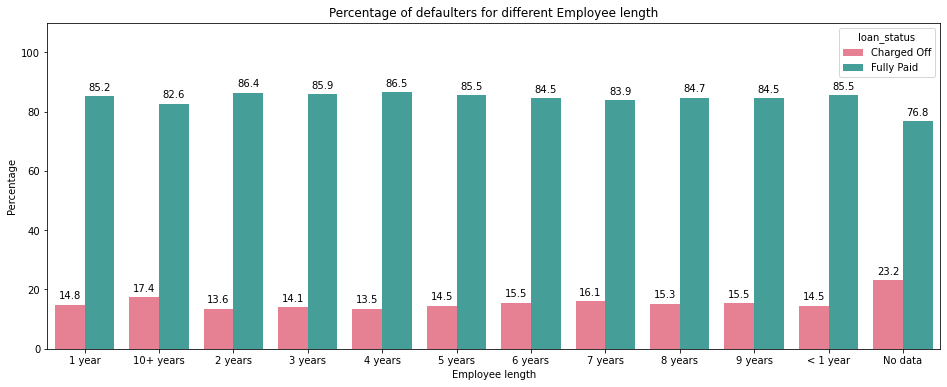

In [57]:
plt.figure(figsize=[16,6])
DC3_pct_sns = sns.barplot(x='emp_length',y='percentage',data = DC3_pct,hue='loan_status',palette='husl')
plt.title('Percentage of defaulters for different Employee length')
plt.ylabel('Percentage')
plt.xlabel('Employee length')
plt.ylim(0,110)
for a in DC3_pct_sns.patches:
    DC3_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can observe there is not much relation with employee length to loan defaulting. The highest difference between categories is **3.9%** and there are no pattern for more or less employee length as to defaulting or not defaulting.(Not considering No data for analysis)

#### Now let's have a look at the derived categorical data and find insights for our analysis

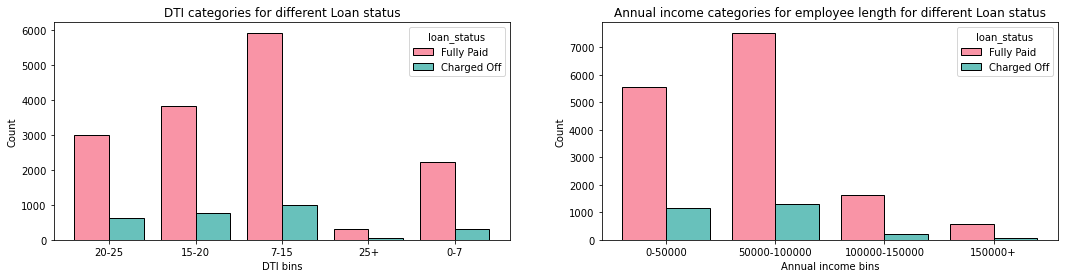

In [58]:
# Categorical information for DTI and Annual income
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
sns.histplot(data=DC,x=DC['dti_cat'],hue=DC['loan_status'],multiple='dodge',shrink=.8,palette='husl')
plt.title('DTI categories for different Loan status')
plt.ylabel('Count')
plt.xlabel('DTI bins')

plt.subplot(1,2,2)
sns.histplot(data=DC,x=DC['annual_inc_cat'],hue=DC['loan_status'],multiple='dodge',shrink=.8,palette='husl')
plt.title('Annual income categories for employee length for different Loan status')
plt.ylabel('Count')
plt.xlabel('Annual income bins')

plt.show()

In [59]:
#Lets have a look at the percentage values for the defaulters
DC4 = DC.groupby(['dti_cat', 'loan_status'])['id'].agg('count')
DC4_pct = DC4.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

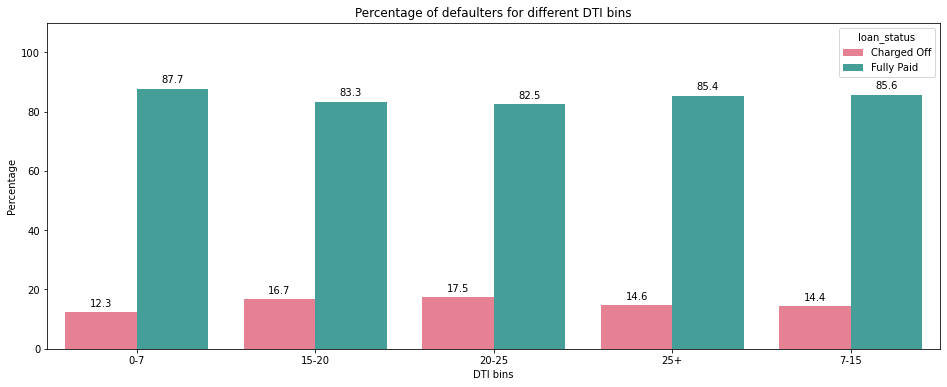

In [60]:
plt.figure(figsize=[16,6])
DC4_pct_sns = sns.barplot(x='dti_cat',y='percentage',data = DC4_pct,hue='loan_status',palette='husl')
plt.title('Percentage of defaulters for different DTI bins')
plt.ylabel('Percentage')
plt.xlabel('DTI bins')
plt.ylim(0,110)
for a in DC4_pct_sns.patches:
    DC4_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see an increasing trend of defaulting for higher DTI bins. The 0-7 bin has the lowest defaulting percentage. And 20-25 having the highest

In [61]:
#Lets have a look at the percentage values for the defaulters
DC5 = DC.groupby(['annual_inc_cat', 'loan_status'])['id'].agg('count')
DC5_pct = DC5.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

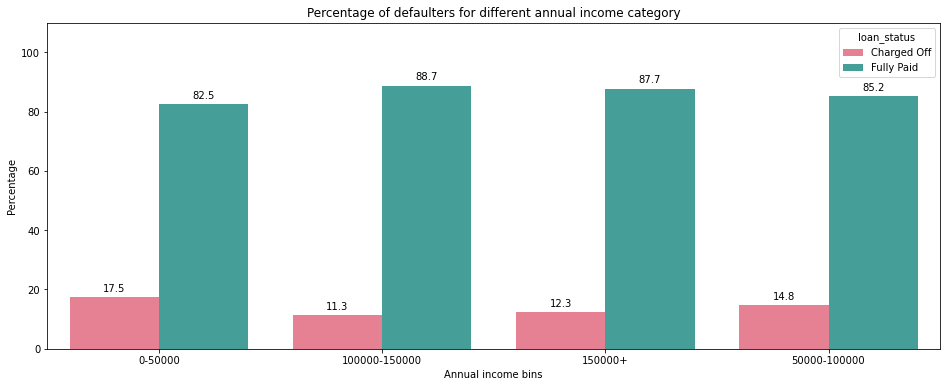

In [62]:
plt.figure(figsize=[16,6])
DC5_pct_sns = sns.barplot(x='annual_inc_cat',y='percentage',data = DC5_pct,hue='loan_status',palette='husl')
plt.title('Percentage of defaulters for different annual income category')
plt.ylabel('Percentage')
plt.xlabel('Annual income bins')
plt.ylim(0,110)
for a in DC5_pct_sns.patches:
    DC5_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

This shows that lower income groups have the highest default rates. We can see **6.4%** more defaulters in the 0-50000 annual income group than the 100000-150000 income group.

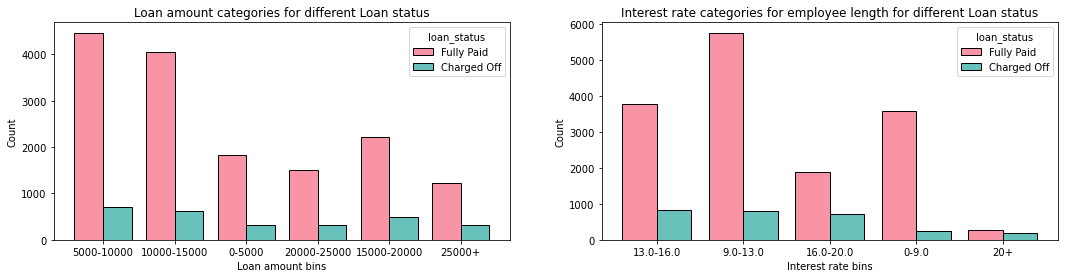

In [63]:
# Categorical information for Loan amount and Interest rates
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
sns.histplot(data=DC,x=DC['loan_amnt_cat'],hue=DC['loan_status'],multiple='dodge',shrink=.8,palette='husl')
plt.title('Loan amount categories for different Loan status')
plt.ylabel('Count')
plt.xlabel('Loan amount bins')

plt.subplot(1,2,2)
sns.histplot(data=DC,x=DC['int_rate_cat'],hue=DC['loan_status'],multiple='dodge',shrink=.8,palette='husl')
plt.title('Interest rate categories for employee length for different Loan status')
plt.ylabel('Count')
plt.xlabel('Interest rate bins')

plt.show()

In [64]:
#Lets have a look at the percentage values for the defaulters
DC6 = DC.groupby(['loan_amnt_cat', 'loan_status'])['id'].agg('count')
DC6_pct = DC6.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

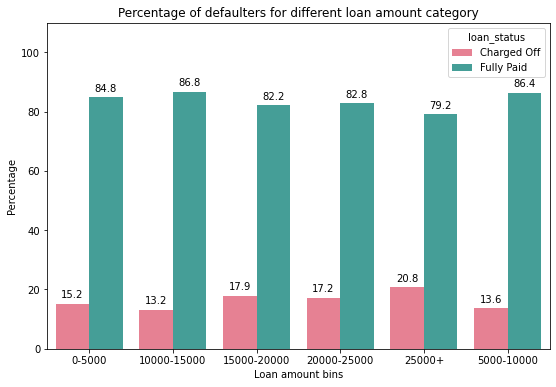

In [65]:
plt.figure(figsize=[9,6])
DC6_pct_sns = sns.barplot(x='loan_amnt_cat',y='percentage',data = DC6_pct,hue='loan_status',palette='husl')
plt.title('Percentage of defaulters for different loan amount category')
plt.ylabel('Percentage')
plt.xlabel('Loan amount bins')
plt.ylim(0,110)
for a in DC6_pct_sns.patches:
    DC6_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

There is no direct relation for the loan amount bins with defaulting but it can be observed that higher loan amounts (25000+) have more number of defaults than lower amounts.

In [66]:
#Lets have a look at the percentage values for the defaulters
DC7 = DC.groupby(['int_rate_cat', 'loan_status'])['id'].agg('count')
DC7_pct = DC7.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

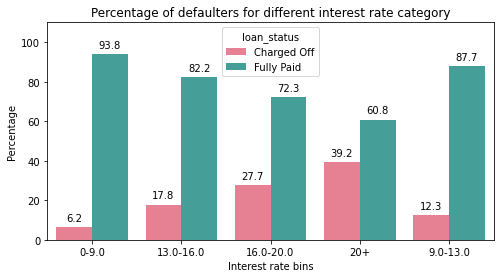

In [67]:
plt.figure(figsize=[8,4])
DC7_pct_sns = sns.barplot(x='int_rate_cat',y='percentage',data = DC7_pct,hue='loan_status',palette='husl')
plt.title('Percentage of defaulters for different interest rate category')
plt.ylabel('Percentage')
plt.xlabel('Interest rate bins')
plt.ylim(0,110)
for a in DC7_pct_sns.patches:
    DC7_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

From the above graph, we can say the more the interest rate, the less likely the customers are going to pay. In other terms, the higher interest rates are more likely to get defaulted.

#### Insights for loans applied for Credit Card

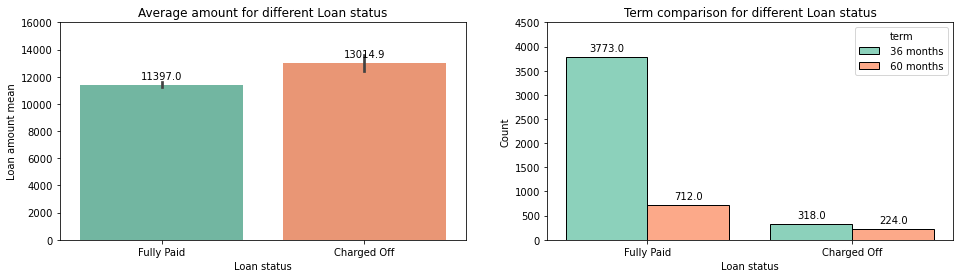

In [68]:
# Checking for Debt Consolidation
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
CC_LA = sns.barplot(y=CC['loan_amnt'],data=CC,estimator=mean,x=CC['loan_status'],palette='Set2')
plt.title('Average amount for different Loan status')
plt.ylabel('Loan amount mean')
plt.xlabel('Loan status')
plt.ylim(0,16000)
for a in CC_LA.patches:
    CC_LA.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(1,2,2)
CC_LS = sns.histplot(data=CC,x=CC['loan_status'],hue=CC['term'],multiple='dodge',shrink=.8,palette='Set2')
plt.title('Term comparison for different Loan status')
plt.ylabel('Count')
plt.xlabel('Loan status')
plt.ylim(0,4500)
for a in CC_LS.patches:
    CC_LS.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

From the above graph we can observe the following:
1. The average loan amounts for Default loans are higher than Paid. This implies that more the loan amount, the more is the chance of defaulting
2. The term of 60 months is more to default than the term for 36 months. It implies that longer loan is more likely to default than a shorter loan tenure

In [69]:
#Lets have a look at the percentage values for the defaulters
CC1 = CC.groupby(['term', 'loan_status'])['id'].agg('count')
CC1_pct = CC1.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

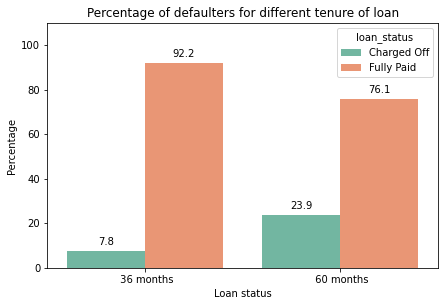

In [70]:
plt.figure(figsize=[7,4.5])
CC1_pct_sns = sns.barplot(x='term',y='percentage',data = CC1_pct,hue='loan_status',palette='Set2')
plt.title('Percentage of defaulters for different tenure of loan')
plt.ylabel('Percentage')
plt.xlabel('Loan status')
plt.ylim(0,110)
for a in CC1_pct_sns.patches:
    CC1_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see there is a considerable difference for loan defaulting for longer loan period. Around **16.1%** difference is found between the 36 months and 60 months period for Credit card loans

We can observe that for Debt Consolidation loans, the mean amount is less for fully paid loans. This suggests that lower loan amounts are likely to get paid and higher amounts might get defaulted.

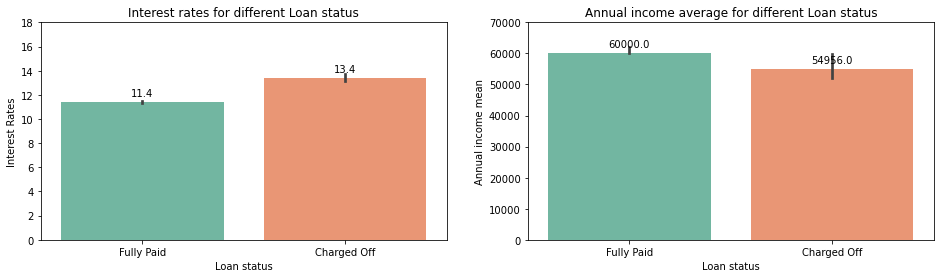

In [71]:
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
CC_IR = sns.barplot(y=CC['int_rate'],data=CC,estimator=mean,x=CC['loan_status'],palette='Set2')
plt.title('Interest rates for different Loan status')
plt.ylabel('Interest Rates')
plt.xlabel('Loan status')
plt.ylim(0,18)
for a in CC_IR.patches:
    CC_IR.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(1,2,2)
CC_AI = sns.barplot(y=CC['annual_inc'],data=CC,estimator=median,x=CC['loan_status'],palette='Set2')
plt.title('Annual income average for different Loan status')
plt.ylabel('Annual income mean')
plt.xlabel('Loan status')
plt.ylim(0,70000)
for a in CC_AI.patches:
    CC_AI.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

From the above graph we can observe the following:
1. The average interest rates for Default loans are higher than the ones that are paid. This means, lower the interest rates, the more the chances of paying back.
2. The lesser the annual income for a customer, the less likely they are to pay back the loans(defaulters).

This suggests that the lower the interest rates, the lesser are the defaults. It can also be considered that loans with interest rates less than 11% are very less likely to default considering the other parameters are also satisfying.

This shows that more the annual salary of a consumer, the less likely they are to default.

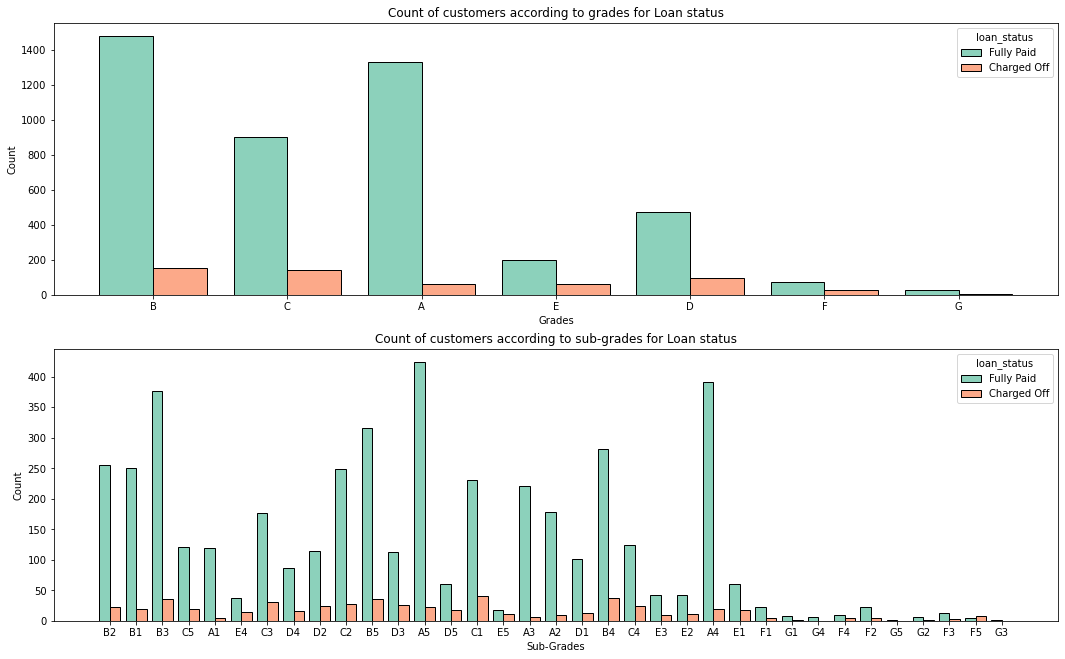

In [72]:
#Let's have a look at the grades and sub-grades
plt.figure(figsize=[18,11])
plt.subplot(2,1,1)
sns.histplot(data=CC,x=CC['grade'],hue=CC['loan_status'],multiple='dodge',shrink=.8,palette='Set2')
plt.title('Count of customers according to grades for Loan status')
plt.ylabel('Count')
plt.xlabel('Grades')

plt.subplot(2,1,2)
sns.histplot(data=CC,x=CC['sub_grade'],hue=CC['loan_status'],multiple='dodge',shrink=.8,palette='Set2')
plt.title('Count of customers according to sub-grades for Loan status')
plt.ylabel('Count')
plt.xlabel('Sub-Grades')

plt.show()

In [73]:
#Lets find the relation of grades with loan defaulting
CC2 = CC.groupby(['grade', 'loan_status'])['id'].agg('count')
CC2_pct = CC2.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

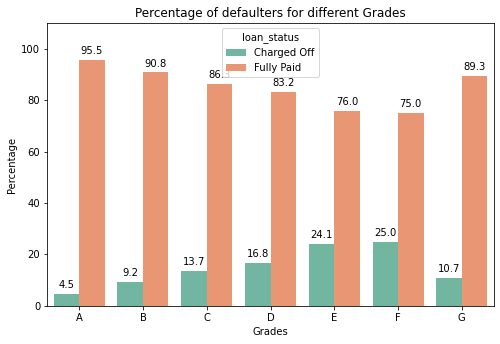

In [74]:
plt.figure(figsize=[8,5.2])
CC2_pct_sns = sns.barplot(x='grade',y='percentage',data = CC2_pct,hue='loan_status',palette='Set2')
plt.title('Percentage of defaulters for different Grades')
plt.ylabel('Percentage')
plt.xlabel('Grades')
plt.ylim(0,110)
for a in CC2_pct_sns.patches:
    CC2_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see there is a relation between the grades and defaulting - A having the least defaulting percentage and f having the most. For a few grades like E the percentage of defaulting are very high as well. The difference in loan defaulters between grade A, the lowest defaulter, and F, the highest defaulter is around 20.5%.

We can see there is a relation between the grades and defaulting - A having the least defaulting percentage and F having the most

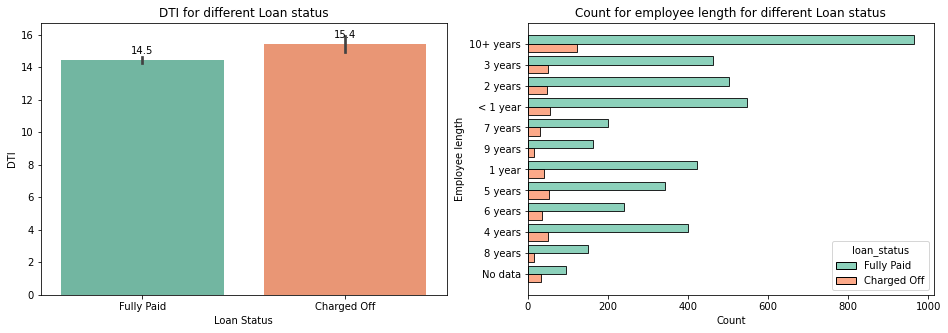

In [75]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
CC_DT = sns.barplot(y=CC['dti'],data=CC,estimator=mean,x=CC['loan_status'],palette='Set2')
plt.title('DTI for different Loan status')
plt.ylabel('DTI')
plt.xlabel('Loan Status')
for a in CC_DT.patches:
    CC_DT.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(1,2,2)
sns.histplot(data=CC,y=CC['emp_length'],hue=CC['loan_status'],multiple='dodge',shrink=.8,palette='Set2')
plt.title('Count for employee length for different Loan status')
plt.ylabel('Employee length')
plt.xlabel('Count')

plt.show()

From the DTI graph we can say that the more the debt to income ratio, the more are the chances of defaulting the loan.

In [76]:
#Lets have a look at the percentage values for the defaulters
CC3 = CC.groupby(['emp_length', 'loan_status'])['id'].agg('count')
CC3_pct = CC3.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

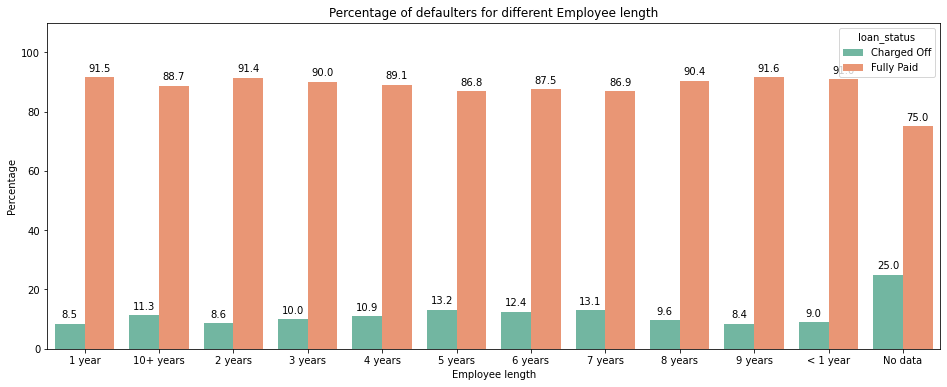

In [77]:
plt.figure(figsize=[16,6])
CC3_pct_sns = sns.barplot(x='emp_length',y='percentage',data = CC3_pct,hue='loan_status',palette='Set2')
plt.title('Percentage of defaulters for different Employee length')
plt.ylabel('Percentage')
plt.xlabel('Employee length')
plt.ylim(0,110)
for a in CC3_pct_sns.patches:
    CC3_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can observe there is not much direct relation with employee length to loan defaulting. (Not considering No data for analysis)

#### Now let's have a look at the derived categorical data and find insights for our analysis

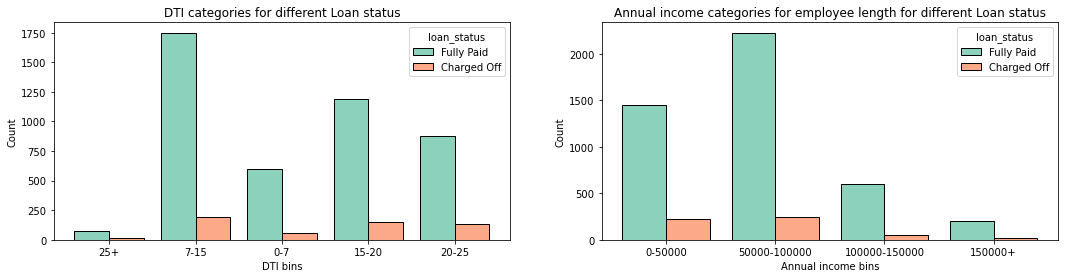

In [78]:
# Categorical information for DTI and Annual income
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
sns.histplot(data=CC,x=CC['dti_cat'],hue=CC['loan_status'],multiple='dodge',shrink=.8,palette='Set2')
plt.title('DTI categories for different Loan status')
plt.ylabel('Count')
plt.xlabel('DTI bins')

plt.subplot(1,2,2)
sns.histplot(data=CC,x=CC['annual_inc_cat'],hue=CC['loan_status'],multiple='dodge',shrink=.8,palette='Set2')
plt.title('Annual income categories for employee length for different Loan status')
plt.ylabel('Count')
plt.xlabel('Annual income bins')

plt.show()

In [79]:
#Lets have a look at the percentage values for the defaulters
CC4 = CC.groupby(['dti_cat', 'loan_status'])['id'].agg('count')
CC4_pct = CC4.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

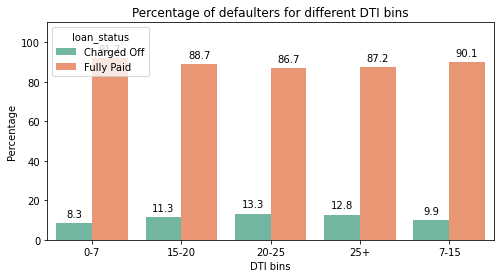

In [80]:
plt.figure(figsize=[8,4])
CC4_pct_sns = sns.barplot(x='dti_cat',y='percentage',data = CC4_pct,hue='loan_status',palette='Set2')
plt.title('Percentage of defaulters for different DTI bins')
plt.ylabel('Percentage')
plt.xlabel('DTI bins')
plt.ylim(0,110)
for a in CC4_pct_sns.patches:
    CC4_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see an increasing trend of defaulting for higher DTI bins. The 0-7 bin has the lowest defaulting percentage. And 20-25 having the highest

In [81]:
#Lets have a look at the percentage values for the defaulters
CC5 = CC.groupby(['annual_inc_cat', 'loan_status'])['id'].agg('count')
CC5_pct = CC5.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

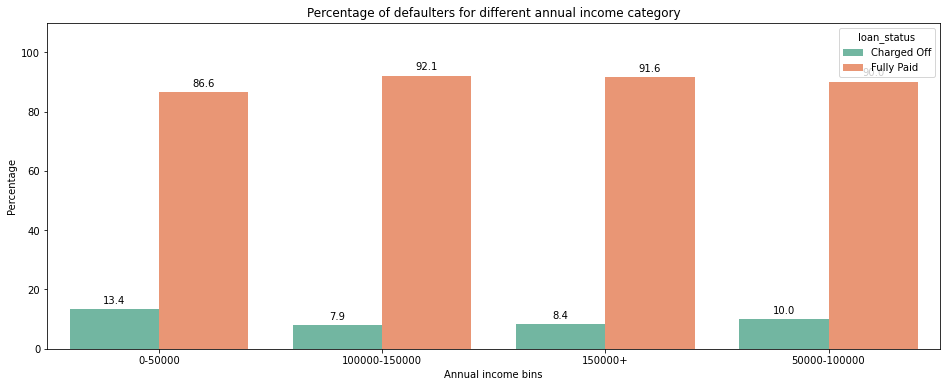

In [82]:
plt.figure(figsize=[16,6])
CC5_pct_sns = sns.barplot(x='annual_inc_cat',y='percentage',data = CC5_pct,hue='loan_status',palette='Set2')
plt.title('Percentage of defaulters for different annual income category')
plt.ylabel('Percentage')
plt.xlabel('Annual income bins')
plt.ylim(0,110)
for a in CC5_pct_sns.patches:
    CC5_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

This shows that lower income groups have the highest default rates. We can see **5.5%** more defaulters in the 0-50000 annual income group than the 100000-150000 income group.

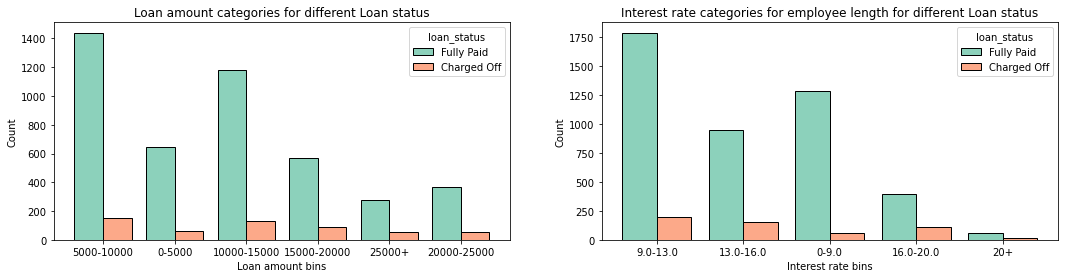

In [83]:
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
sns.histplot(data=CC,x=CC['loan_amnt_cat'],hue=CC['loan_status'],multiple='dodge',shrink=.8,palette='Set2')
plt.title('Loan amount categories for different Loan status')
plt.ylabel('Count')
plt.xlabel('Loan amount bins')

plt.subplot(1,2,2)
sns.histplot(data=CC,x=CC['int_rate_cat'],hue=CC['loan_status'],multiple='dodge',shrink=.8,palette='Set2')
plt.title('Interest rate categories for employee length for different Loan status')
plt.ylabel('Count')
plt.xlabel('Interest rate bins')

plt.show()

In [84]:
#Lets have a look at the percentage values for the defaulters
CC6 = CC.groupby(['loan_amnt_cat', 'loan_status'])['id'].agg('count')
CC6_pct = CC6.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

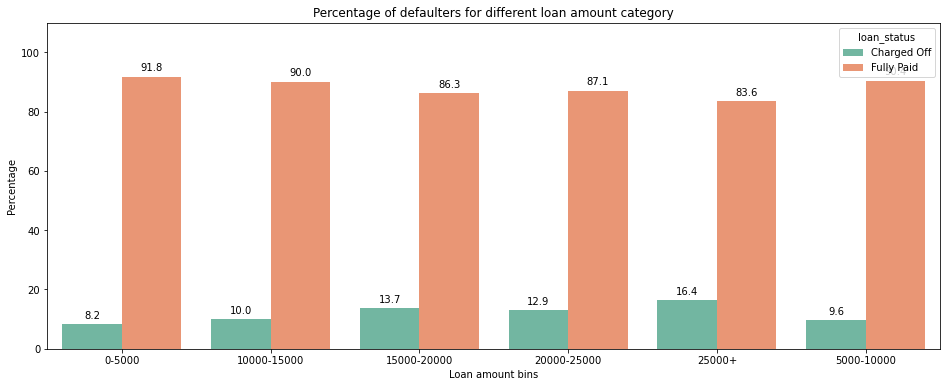

In [85]:
plt.figure(figsize=[16,6])
CC6_pct_sns = sns.barplot(x='loan_amnt_cat',y='percentage',data = CC6_pct,hue='loan_status',palette='Set2')
plt.title('Percentage of defaulters for different loan amount category')
plt.ylabel('Percentage')
plt.xlabel('Loan amount bins')
plt.ylim(0,110)
for a in CC6_pct_sns.patches:
    CC6_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see the default percentage increases with the bins as it goes up

In [86]:
#Lets have a look at the percentage values for the defaulters
CC7 = CC.groupby(['int_rate_cat', 'loan_status'])['id'].agg('count')
CC7_pct = CC7.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

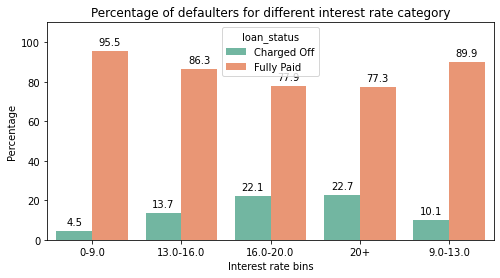

In [87]:
plt.figure(figsize=[8,4])
CC7_pct_sns = sns.barplot(x='int_rate_cat',y='percentage',data = CC7_pct,hue='loan_status',palette='Set2')
plt.title('Percentage of defaulters for different interest rate category')
plt.ylabel('Percentage')
plt.xlabel('Interest rate bins')
plt.ylim(0,110)
for a in CC7_pct_sns.patches:
    CC7_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

From the above graph, we can say the more the interest rate, the less likely the customers are going to pay. In other terms, the higher interest rates are more likely to get defaulted. The lowest and the highest bin have percentage difference of **18.2%**

#### Insights for loans applied for Other

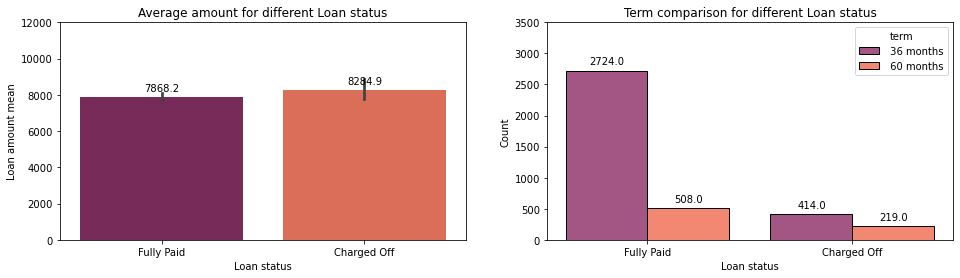

In [88]:
# Checking for Debt Consolidation
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
DT_LA = sns.barplot(y=OT['loan_amnt'],data=OT,estimator=mean,x=OT['loan_status'],palette='rocket')
plt.title('Average amount for different Loan status')
plt.ylabel('Loan amount mean')
plt.xlabel('Loan status')
plt.ylim(0,12000)
for a in DT_LA.patches:
    DT_LA.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(1,2,2)
DT_LS = sns.histplot(data=OT,x=OT['loan_status'],hue=OT['term'],palette='rocket',multiple='dodge',shrink=.8)
plt.title('Term comparison for different Loan status')
plt.ylabel('Count')
plt.xlabel('Loan status')
plt.ylim(0,3500)
for a in DT_LS.patches:
    DT_LS.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

From the above graph we can observe the following:
1. The average loan amounts for Default loans are higher than Paid. This implies that more the loan amount, the more is the chance of defaulting
2. The term of 60 months is more to default than the term for 36 months. It implies that longer loan is more likely to default than a shorter loan tenure

In [89]:
#Lets have a look at the percentage values for the defaulters
OT1 = OT.groupby(['term', 'loan_status'])['id'].agg('count')
OT1_pct = OT1.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

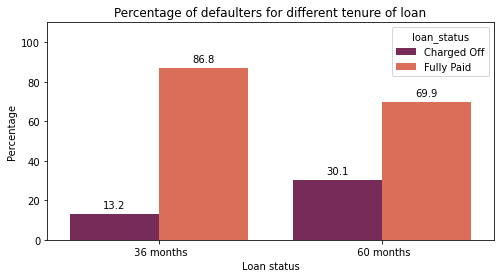

In [90]:
plt.figure(figsize=[8,4])
OT1_pct_sns = sns.barplot(x='term',y='percentage',data = OT1_pct,hue='loan_status',palette='rocket')
plt.title('Percentage of defaulters for different tenure of loan')
plt.ylabel('Percentage')
plt.xlabel('Loan status')
plt.ylim(0,110)
for a in OT1_pct_sns.patches:
    OT1_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see there is a considerable difference for loan defaulting for longer loan period. Around **16.9%** difference is found between the 36 months and 60 months period for Debt Consolidation loan defaults. This means more the tenure, higher the chance of defaulting

We can observe that for Other loans, the mean amount is less for fully paid loans. This suggests that lower loan amounts are likely to get paid and higher amounts might get defaulted.

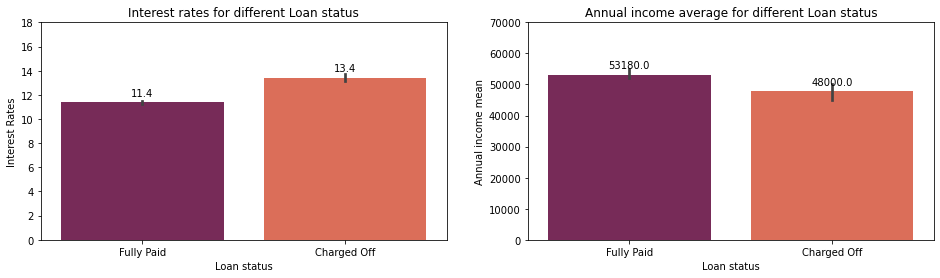

In [91]:
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
OT_IR = sns.barplot(y=OT['int_rate'],data=OT,estimator=mean,x=OT['loan_status'],palette='rocket')
plt.title('Interest rates for different Loan status')
plt.ylabel('Interest Rates')
plt.xlabel('Loan status')
plt.ylim(0,18)
for a in OT_IR.patches:
    OT_IR.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(1,2,2)
OT_AI = sns.barplot(y=OT['annual_inc'],data=OT,estimator=median,x=OT['loan_status'],palette='rocket')
plt.title('Annual income average for different Loan status')
plt.ylabel('Annual income mean')
plt.xlabel('Loan status')
plt.ylim(0,70000)
for a in OT_AI.patches:
    OT_AI.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

From the above graph we can observe the following:
1. The average interest rates for Default loans are higher than the ones that are paid. This means, lower the interest rates, the more the chances of paying back.
2. The lesser the annual income for a customer, the less likely they are to pay back the loans(defaulters).

This suggests that the lower the interest rates, the lesser are the defaults. 

This shows that more the annual salary of a consumer, the less likely they are to default.

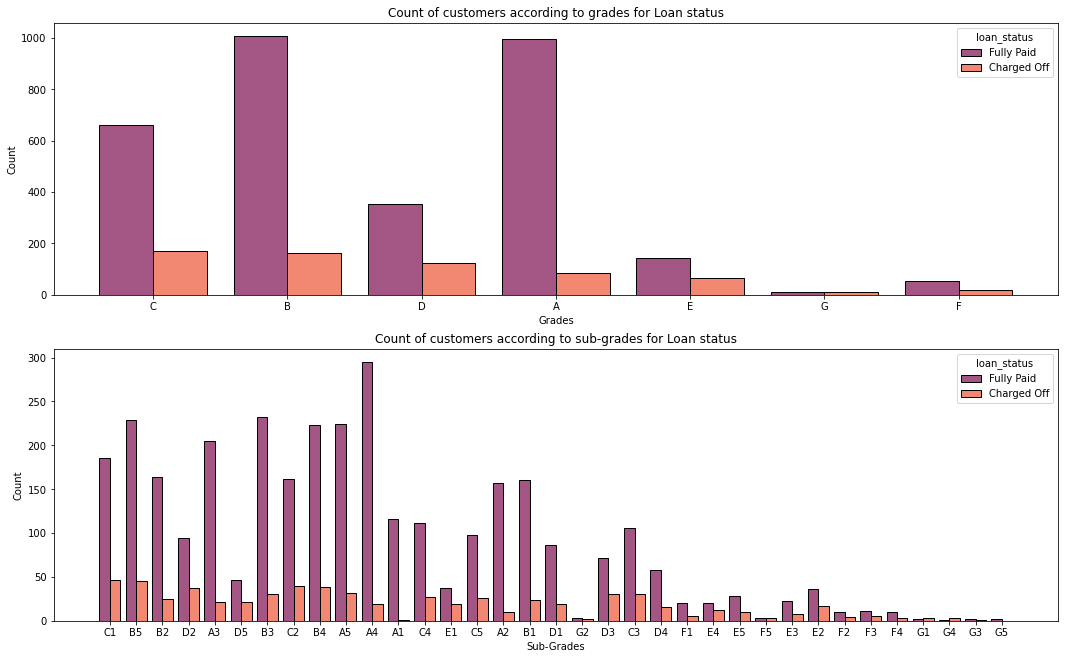

In [92]:
#Let's have a look at the grades and sub-grades
plt.figure(figsize=[18,11])
plt.subplot(2,1,1)
sns.histplot(data=OT,x=OT['grade'],hue=OT['loan_status'],multiple='dodge',shrink=.8,palette='rocket')
plt.title('Count of customers according to grades for Loan status')
plt.ylabel('Count')
plt.xlabel('Grades')

plt.subplot(2,1,2)
sns.histplot(data=OT,x=OT['sub_grade'],hue=OT['loan_status'],multiple='dodge',shrink=.8,palette='rocket')
plt.title('Count of customers according to sub-grades for Loan status')
plt.ylabel('Count')
plt.xlabel('Sub-Grades')

plt.show()

In [93]:
#Lets find the relation of grades with loan defaulting
OT2 = OT.groupby(['grade', 'loan_status'])['id'].agg('count')
OT2_pct = OT2.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

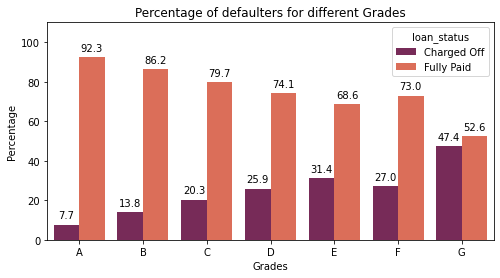

In [94]:
plt.figure(figsize=[8,4])
OT2_pct_sns = sns.barplot(x='grade',y='percentage',data = OT2_pct,hue='loan_status',palette='rocket')
plt.title('Percentage of defaulters for different Grades')
plt.ylabel('Percentage')
plt.xlabel('Grades')
plt.ylim(0,110)
for a in OT2_pct_sns.patches:
    OT2_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see there is a relation between the grades and defaulting - A having the least defaulting percentage and G having the most. For a few grades like F,G the percentage of defaulting are very high as well. The difference in loan defaulters between grade A, the lowest defaulter, and G, the highest defaulter is around **39.7%**.

We can see there is a relation between the grades and defaulting - A having the least defaulting percentage and G having the most

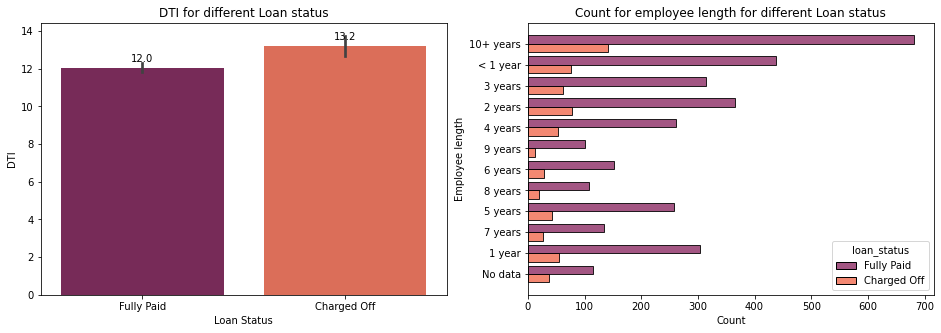

In [95]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
OT_DT = sns.barplot(y=OT['dti'],data=OT,estimator=mean,x=OT['loan_status'],palette='rocket')
plt.title('DTI for different Loan status')
plt.ylabel('DTI')
plt.xlabel('Loan Status')
for a in OT_DT.patches:
    OT_DT.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(1,2,2)
sns.histplot(data=OT,y=OT['emp_length'],hue=OT['loan_status'],multiple='dodge',shrink=.8,palette='rocket')
plt.title('Count for employee length for different Loan status')
plt.ylabel('Employee length')
plt.xlabel('Count')

plt.show()

From the DTI graph we can say that the more the debt to income ratio, the more are the chances of defaulting the loan.

In [96]:
#Lets have a look at the percentage values for the defaulters
OT3 = OT.groupby(['emp_length', 'loan_status'])['id'].agg('count')
OT3_pct = OT3.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

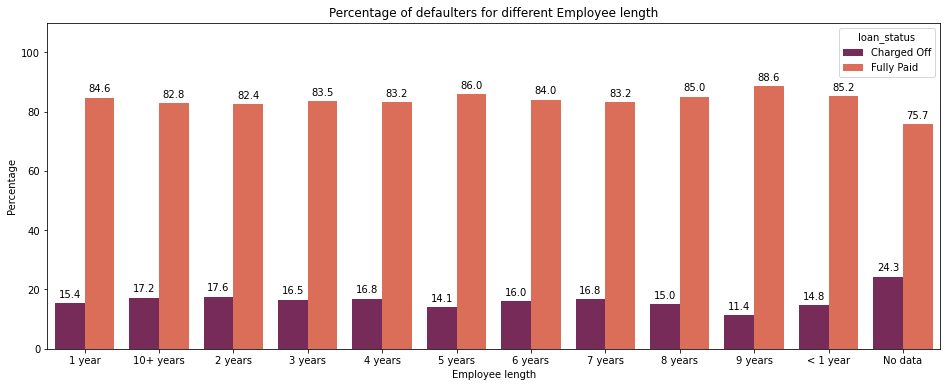

In [97]:
plt.figure(figsize=[16,6])
OT3_pct_sns = sns.barplot(x='emp_length',y='percentage',data = OT3_pct,hue='loan_status',palette='rocket')
plt.title('Percentage of defaulters for different Employee length')
plt.ylabel('Percentage')
plt.xlabel('Employee length')
plt.ylim(0,110)
for a in OT3_pct_sns.patches:
    OT3_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can observe there is not much relation with employee length to loan defaulting. The highest difference between categories is **6.2%** and there are no pattern for more or less employee length as to defaulting or not defaulting. (Not considering No data for analysis)

We can observe there is not much relation with employee length to loan defaulting

#### Now let's have a look at the derived categorical data and find insights for our analysis

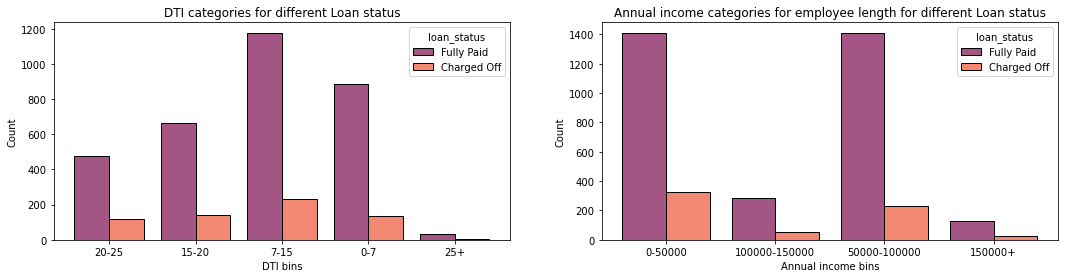

In [98]:
# Categorical information for DTI and Annual income
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
sns.histplot(data=OT,x=OT['dti_cat'],hue=OT['loan_status'],multiple='dodge',shrink=.8,palette='rocket')
plt.title('DTI categories for different Loan status')
plt.ylabel('Count')
plt.xlabel('DTI bins')

plt.subplot(1,2,2)
sns.histplot(data=OT,x=OT['annual_inc_cat'],hue=OT['loan_status'],multiple='dodge',shrink=.8,palette='rocket')
plt.title('Annual income categories for employee length for different Loan status')
plt.ylabel('Count')
plt.xlabel('Annual income bins')

plt.show()

In [99]:
#Lets have a look at the percentage values for the defaulters
OT4 = OT.groupby(['dti_cat', 'loan_status'])['id'].agg('count')
OT4_pct = OT4.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

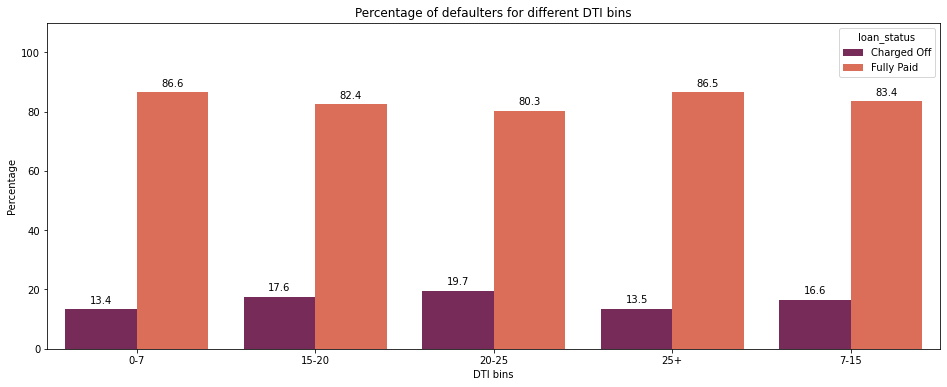

In [100]:
plt.figure(figsize=[16,6])
OT4_pct_sns = sns.barplot(x='dti_cat',y='percentage',data = OT4_pct,hue='loan_status',palette='rocket')
plt.title('Percentage of defaulters for different DTI bins')
plt.ylabel('Percentage')
plt.xlabel('DTI bins')
plt.ylim(0,110)
for a in OT4_pct_sns.patches:
    OT4_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see an increasing trend of defaulting for higher DTI bins. The 0-7 bin has the lowest defaulting percentage. And 20-25 having the highest

In [101]:
#Lets have a look at the percentage values for the defaulters
OT5 = OT.groupby(['annual_inc_cat', 'loan_status'])['id'].agg('count')
OT5_pct = OT5.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

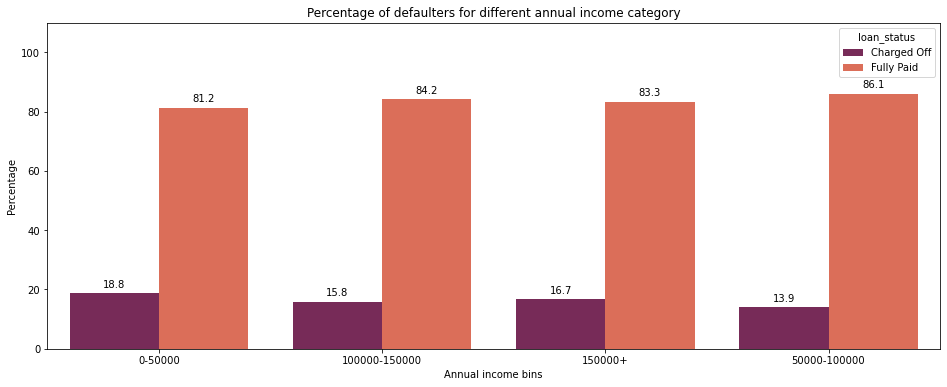

In [102]:
plt.figure(figsize=[16,6])
OT5_pct_sns = sns.barplot(x='annual_inc_cat',y='percentage',data = OT5_pct,hue='loan_status',palette='rocket')
plt.title('Percentage of defaulters for different annual income category')
plt.ylabel('Percentage')
plt.xlabel('Annual income bins')
plt.ylim(0,110)
for a in OT5_pct_sns.patches:
    OT5_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

This shows that lower income groups have the highest default rates. We can see **4.9%** more defaulters in the 0-50000 annual income group than the 100000-150000 income group.

We can see an increasing trend of defaulting for higher DTI bins. The 0-7 bin has the lowest defaulting percentage. And 20-25 having the highest

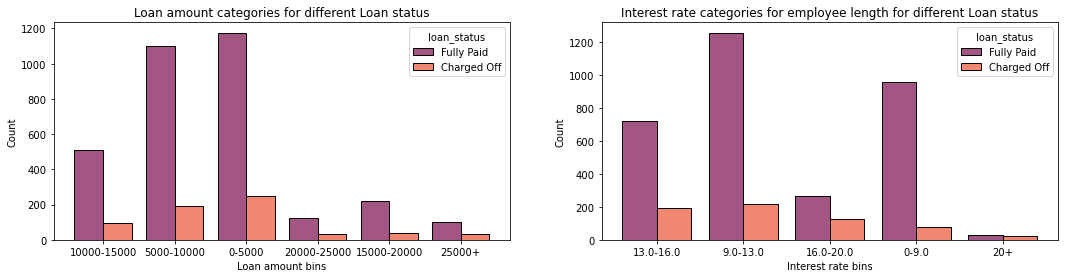

In [103]:
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
sns.histplot(data=OT,x=OT['loan_amnt_cat'],hue=OT['loan_status'],multiple='dodge',shrink=.8,palette='rocket')
plt.title('Loan amount categories for different Loan status')
plt.ylabel('Count')
plt.xlabel('Loan amount bins')

plt.subplot(1,2,2)
sns.histplot(data=OT,x=OT['int_rate_cat'],hue=OT['loan_status'],multiple='dodge',shrink=.8,palette='rocket')
plt.title('Interest rate categories for employee length for different Loan status')
plt.ylabel('Count')
plt.xlabel('Interest rate bins')

plt.show()

In [104]:
#Lets have a look at the percentage values for the defaulters
OT6 = OT.groupby(['loan_amnt_cat', 'loan_status'])['id'].agg('count')
OT6_pct = OT6.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

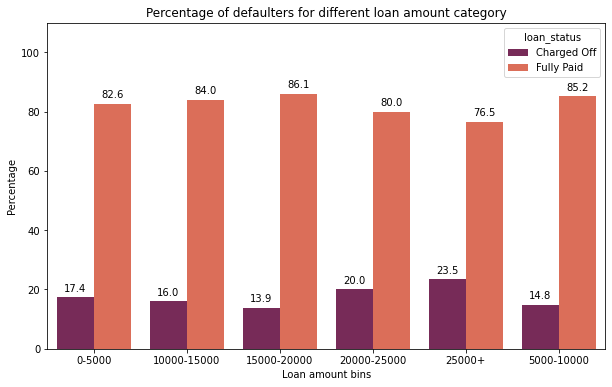

In [105]:
plt.figure(figsize=[10,6])
OT6_pct_sns = sns.barplot(x='loan_amnt_cat',y='percentage',data = OT6_pct,hue='loan_status',palette='rocket')
plt.title('Percentage of defaulters for different loan amount category')
plt.ylabel('Percentage')
plt.xlabel('Loan amount bins')
plt.ylim(0,110)
for a in OT6_pct_sns.patches:
    OT6_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

There is no direct relation for the loan amount bins with defaulting but it can be observed that higher loan amounts (25000+) have more number of defaults than lower amounts.

In [106]:
#Lets have a look at the percentage values for the defaulters
OT7 = OT.groupby(['int_rate_cat', 'loan_status'])['id'].agg('count')
OT7_pct = OT7.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

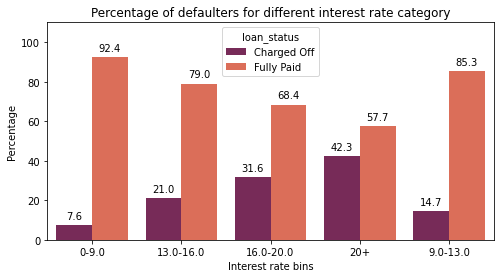

In [107]:
plt.figure(figsize=[8,4])
OT7_pct_sns = sns.barplot(x='int_rate_cat',y='percentage',data = OT7_pct,hue='loan_status',palette='rocket')
plt.title('Percentage of defaulters for different interest rate category')
plt.ylabel('Percentage')
plt.xlabel('Interest rate bins')
plt.ylim(0,110)
for a in OT7_pct_sns.patches:
    OT7_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

From the above graph, we can say the more the interest rate, the less likely the customers are going to pay. In other terms, the higher interest rates are more likely to get defaulted.

#### Insights for loans applied for Home improvement

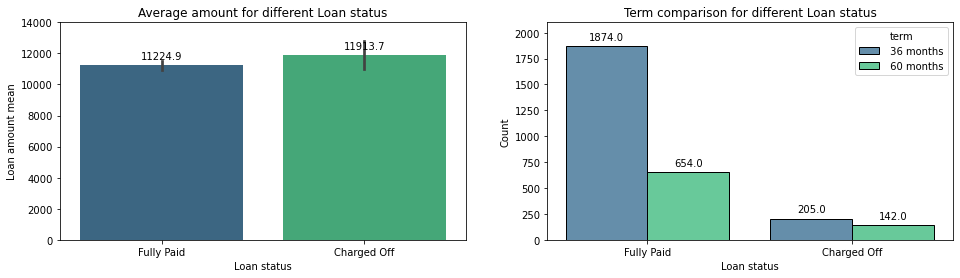

In [108]:
# Checking for Debt Consolidation
from numpy import mean
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
HI_LA = sns.barplot(y=HI['loan_amnt'],data=HI,estimator=mean,x=HI['loan_status'],palette='viridis')
plt.title('Average amount for different Loan status')
plt.ylabel('Loan amount mean')
plt.xlabel('Loan status')
plt.ylim(0,14000)
for a in HI_LA.patches:
    HI_LA.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(1,2,2)
HI_LS = sns.histplot(data=HI,x=HI['loan_status'],hue=HI['term'],palette='viridis',multiple='dodge',shrink=.8)
plt.title('Term comparison for different Loan status')
plt.ylabel('Count')
plt.xlabel('Loan status')
plt.ylim(0,2100)
for a in HI_LS.patches:
    HI_LS.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

From the above graph we can observe the following:
1. The average loan amounts for Default loans are higher than Paid. This implies that more the loan amount, the more is the chance of defaulting
2. The term of 60 months is more to default than the term for 36 months. It implies that longer loan is more likely to default than a shorter loan tenure

In [109]:
#Lets have a look at the percentage values for the defaulters
HI1 = HI.groupby(['term', 'loan_status'])['id'].agg('count')
HI1_pct = HI1.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

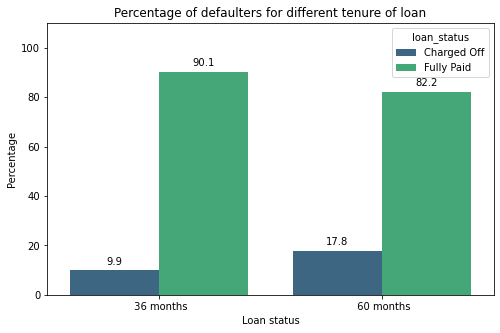

In [110]:
plt.figure(figsize=[8,5])
HI1_pct_sns = sns.barplot(x='term',y='percentage',data = HI1_pct,hue='loan_status',palette='viridis')
plt.title('Percentage of defaulters for different tenure of loan')
plt.ylabel('Percentage')
plt.xlabel('Loan status')
plt.ylim(0,110)
for a in HI1_pct_sns.patches:
    HI1_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see there is a considerable difference for loan defaulting for longer loan period. Around **7.9%** difference is found between the 36 months and 60 months period for Debt Consolidation loans

We can observe that for Debt Consolidation loans, the mean amount is less for fully paid loans. This suggests that lower loan amounts are likely to get paid and higher amounts might get defaulted.

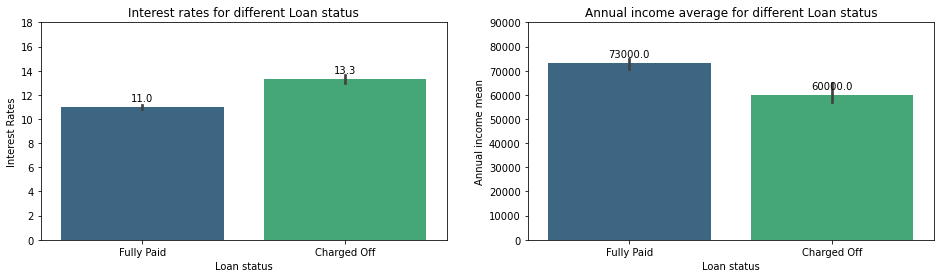

In [111]:
from numpy import median
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
HI_IR = sns.barplot(y=HI['int_rate'],data=HI,estimator=mean,x=HI['loan_status'],palette='viridis')
plt.title('Interest rates for different Loan status')
plt.ylabel('Interest Rates')
plt.xlabel('Loan status')
plt.ylim(0,18)
for a in HI_IR.patches:
    HI_IR.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(1,2,2)
HI_AI = sns.barplot(y=HI['annual_inc'],data=HI,estimator=median,x=HI['loan_status'],palette='viridis')
plt.title('Annual income average for different Loan status')
plt.ylabel('Annual income mean')
plt.xlabel('Loan status')
plt.ylim(0,90000)
for a in HI_AI.patches:
    HI_AI.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

From the above graph we can observe the following:
1. The average interest rates for Default loans are higher than the ones that are paid. This means, lower the interest rates, the more the chances of paying back.
2. The lesser the annual income for a customer, the less likely they are to pay back the loans(defaulters).

This suggests that the lower the interest rates, the lesser are the defaults. 

This shows that more the annual salary of a consumer, the less likely they are to default.

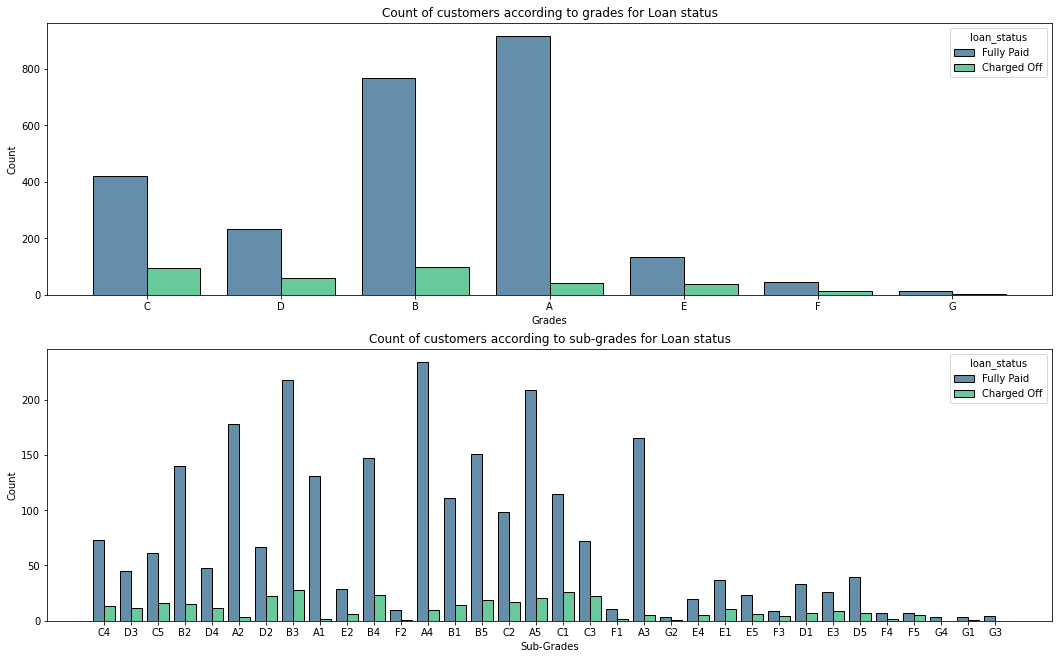

In [112]:
plt.figure(figsize=[18,11])
plt.subplot(2,1,1)
sns.histplot(data=HI,x=HI['grade'],hue=HI['loan_status'],multiple='dodge',shrink=.8,palette='viridis')
plt.title('Count of customers according to grades for Loan status')
plt.ylabel('Count')
plt.xlabel('Grades')

plt.subplot(2,1,2)
sns.histplot(data=HI,x=HI['sub_grade'],hue=HI['loan_status'],multiple='dodge',shrink=.8,palette='viridis')
plt.title('Count of customers according to sub-grades for Loan status')
plt.ylabel('Count')
plt.xlabel('Sub-Grades')

plt.show()

In [113]:
#Lets find the relation of grades with loan defaulting
HI2 = HI.groupby(['grade', 'loan_status'])['id'].agg('count')
HI2_pct = HI2.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

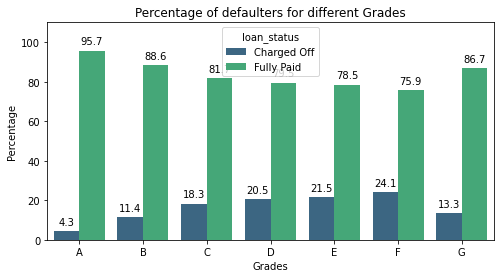

In [114]:
plt.figure(figsize=[8,4])
HI2_pct_sns = sns.barplot(x='grade',y='percentage',data = HI2_pct,hue='loan_status',palette='viridis')
plt.title('Percentage of defaulters for different Grades')
plt.ylabel('Percentage')
plt.xlabel('Grades')
plt.ylim(0,110)
for a in HI2_pct_sns.patches:
    HI2_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see there is a relation between the grades and defaulting - A having the least defaulting percentage and F having the most. For a few grades like E,G the percentage of defaulting are very high as well. The difference in loan defaulters between grade A, the lowest defaulter, and F, the highest defaulter is around **19.8%**.

We can see there is a relation between the grades and defaulting - A having the least defaulting percentage and F having the most

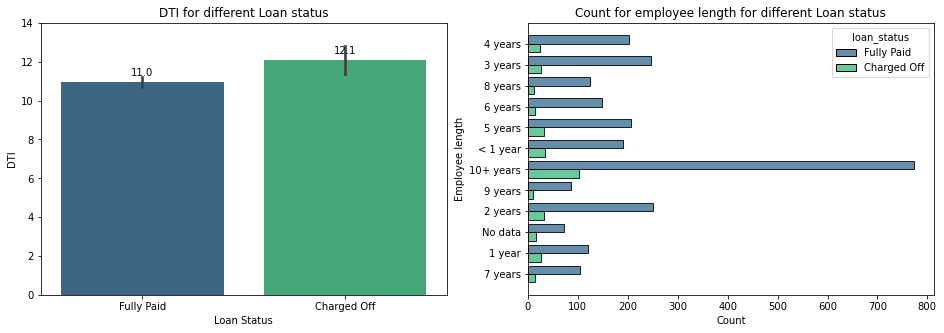

In [115]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
HI_DT = sns.barplot(y=HI['dti'],data=HI,estimator=mean,x=HI['loan_status'],palette='viridis')
plt.title('DTI for different Loan status')
plt.ylabel('DTI')
plt.xlabel('Loan Status')
plt.ylim(0,14)
for a in HI_DT.patches:
    HI_DT.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(1,2,2)
sns.histplot(data=HI,y=HI['emp_length'],hue=HI['loan_status'],multiple='dodge',shrink=.8,palette='viridis')
plt.title('Count for employee length for different Loan status')
plt.ylabel('Employee length')
plt.xlabel('Count')

plt.show()

From the DTI graph we can say that the more the debt to income ratio, the more are the chances of defaulting the loan.

In [116]:
#Lets have a look at the percentage values for the defaulters
HI3 = HI.groupby(['emp_length', 'loan_status'])['id'].agg('count')
HI3_pct = HI3.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

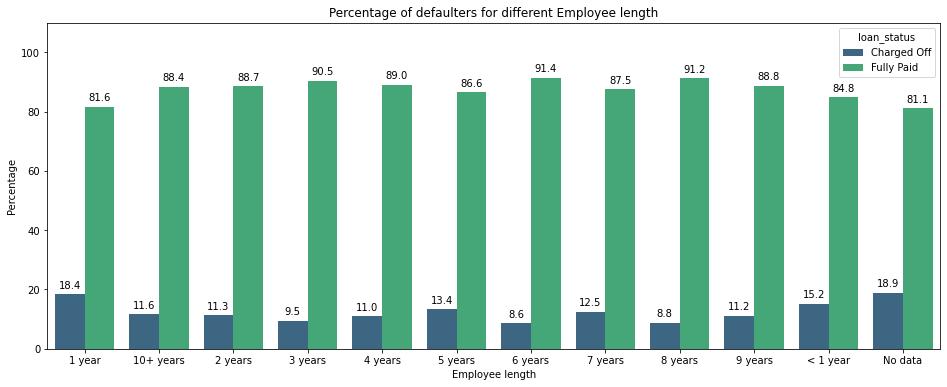

In [117]:
plt.figure(figsize=[16,6])
HI3_pct_sns = sns.barplot(x='emp_length',y='percentage',data = HI3_pct,hue='loan_status',palette='viridis')
plt.title('Percentage of defaulters for different Employee length')
plt.ylabel('Percentage')
plt.xlabel('Employee length')
plt.ylim(0,110)
for a in HI3_pct_sns.patches:
    HI3_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can observe there is not much relation with employee length to loan defaulting. The highest difference between categories is **9.8%** and there are no pattern for more or less employee length as to defaulting or not defaulting.

We can observe there is not much relation with employee length to loan defaulting

#### Now let's have a look at the derived categorical data and find insights for our analysis

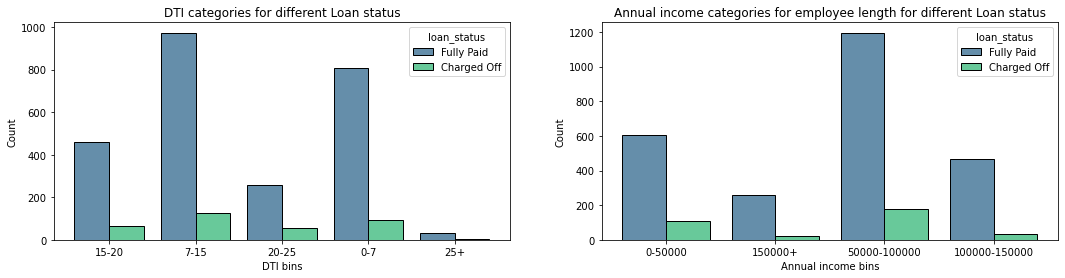

In [118]:
# Categorical information for DTI and Annual income
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
sns.histplot(data=HI,x=HI['dti_cat'],hue=HI['loan_status'],multiple='dodge',shrink=.8,palette='viridis')
plt.title('DTI categories for different Loan status')
plt.ylabel('Count')
plt.xlabel('DTI bins')

plt.subplot(1,2,2)
sns.histplot(data=HI,x=HI['annual_inc_cat'],hue=HI['loan_status'],multiple='dodge',shrink=.8,palette='viridis')
plt.title('Annual income categories for employee length for different Loan status')
plt.ylabel('Count')
plt.xlabel('Annual income bins')

plt.show()

In [119]:
#Lets have a look at the percentage values for the defaulters
HI4 = HI.groupby(['dti_cat', 'loan_status'])['id'].agg('count')
HI4_pct = HI4.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

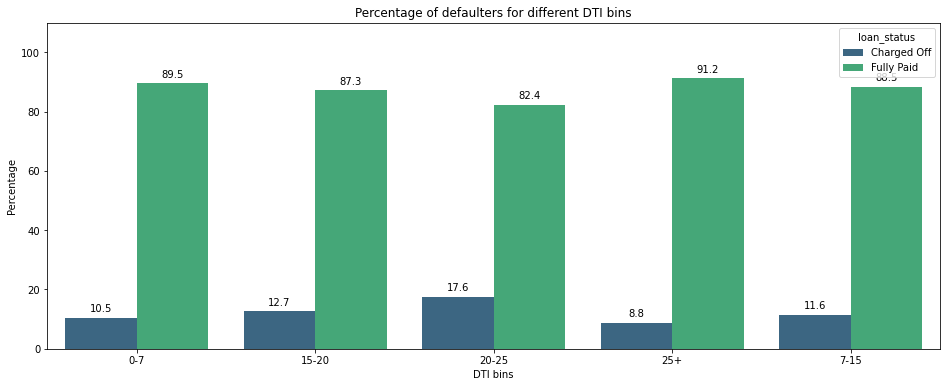

In [120]:
plt.figure(figsize=[16,6])
HI4_pct_sns = sns.barplot(x='dti_cat',y='percentage',data = HI4_pct,hue='loan_status',palette='viridis')
plt.title('Percentage of defaulters for different DTI bins')
plt.ylabel('Percentage')
plt.xlabel('DTI bins')
plt.ylim(0,110)
for a in HI4_pct_sns.patches:
    HI4_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can see an increasing trend of defaulting for higher DTI bins. The 0-7 bin has the lowest defaulting percentage. And 20-25 having the highest

In [121]:
#Lets have a look at the percentage values for the defaulters
HI5 = HI.groupby(['annual_inc_cat', 'loan_status'])['id'].agg('count')
HI5_pct = HI5.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

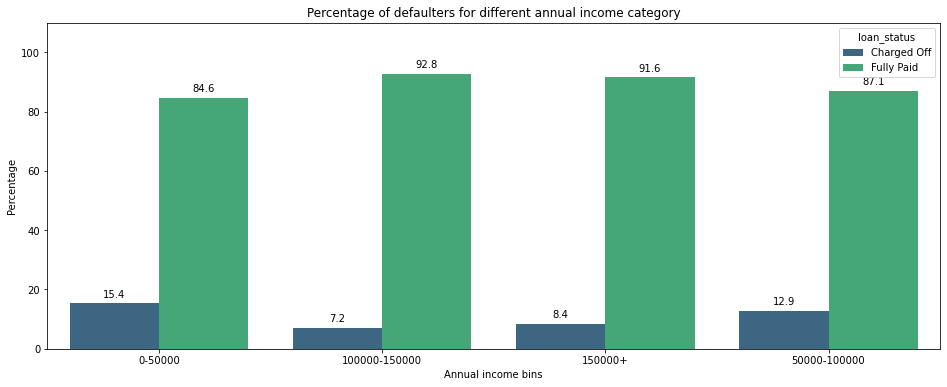

In [122]:
plt.figure(figsize=[16,6])
HI5_pct_sns = sns.barplot(x='annual_inc_cat',y='percentage',data = HI5_pct,hue='loan_status',palette='viridis')
plt.title('Percentage of defaulters for different annual income category')
plt.ylabel('Percentage')
plt.xlabel('Annual income bins')
plt.ylim(0,110)
for a in HI5_pct_sns.patches:
    HI5_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

This shows that lower income groups have the highest default rates. We can see **8.2%** more defaulters in the 0-50000 annual income group than the 100000-150000 income group.

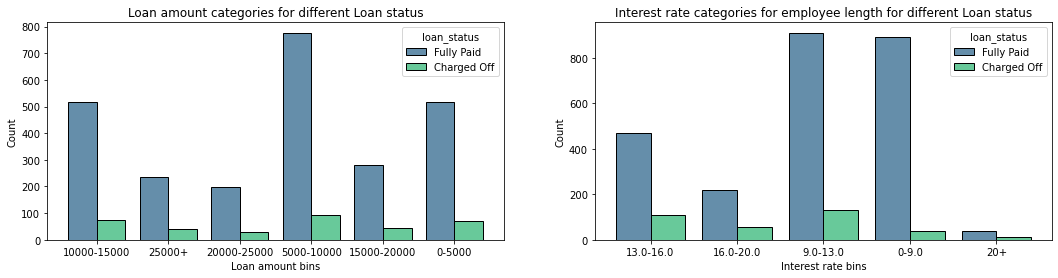

In [123]:
# Categorical information for Loan amount and Interest rates
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
sns.histplot(data=HI,x=HI['loan_amnt_cat'],hue=HI['loan_status'],multiple='dodge',shrink=.8,palette='viridis')
plt.title('Loan amount categories for different Loan status')
plt.ylabel('Count')
plt.xlabel('Loan amount bins')

plt.subplot(1,2,2)
sns.histplot(data=HI,x=HI['int_rate_cat'],hue=HI['loan_status'],multiple='dodge',shrink=.8,palette='viridis')
plt.title('Interest rate categories for employee length for different Loan status')
plt.ylabel('Count')
plt.xlabel('Interest rate bins')

plt.show()

In [124]:
#Lets have a look at the percentage values for the defaulters
HI6 = HI.groupby(['loan_amnt_cat', 'loan_status'])['id'].agg('count')
HI6_pct = HI6.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

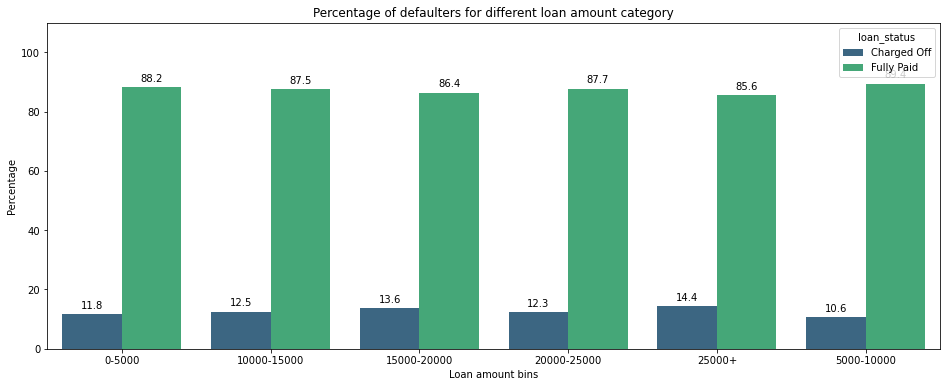

In [125]:
plt.figure(figsize=[16,6])
HI6_pct_sns = sns.barplot(x='loan_amnt_cat',y='percentage',data = HI6_pct,hue='loan_status',palette='viridis')
plt.title('Percentage of defaulters for different loan amount category')
plt.ylabel('Percentage')
plt.xlabel('Loan amount bins')
plt.ylim(0,110)
for a in HI6_pct_sns.patches:
    HI6_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

There is no direct relation for the loan amount bins with defaulting but it can be observed that higher loan amounts (25000+) have more number of defaults than lower amounts.

In [126]:
#Lets have a look at the percentage values for the defaulters
HI7 = HI.groupby(['int_rate_cat', 'loan_status'])['id'].agg('count')
HI7_pct = HI7.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

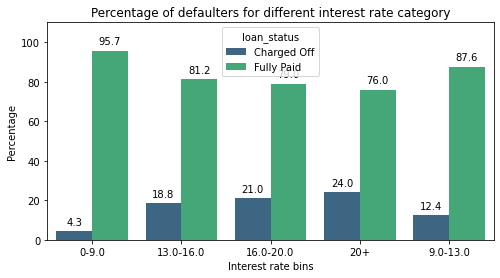

In [127]:
plt.figure(figsize=[8,4])
HI7_pct_sns = sns.barplot(x='int_rate_cat',y='percentage',data = HI7_pct,hue='loan_status',palette='viridis')
plt.title('Percentage of defaulters for different interest rate category')
plt.ylabel('Percentage')
plt.xlabel('Interest rate bins')
plt.ylim(0,110)
for a in HI7_pct_sns.patches:
    HI7_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

From the above graph, we can say the more the interest rate, the less likely the customers are going to pay. In other terms, the higher interest rates are more likely to get defaulted.

Now let's have a look at some of the parameters that are for all loan categories and try to find if any significant default pattern can be acheived.
For this we are going to check for the below parameters:
1. Address state
2. Issue Year
3. Home ownership

In [128]:
# Let's find the relation between the Address State and the default rates
loan_adr = loan.groupby(['addr_state', 'loan_status'])['id'].agg('count')
loan_adr_pct = loan_adr.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

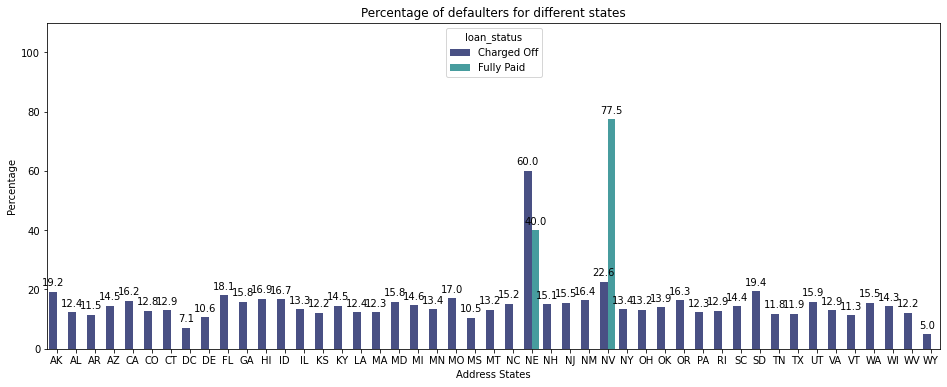

In [129]:
# We are going to check for the high values of default only in each state to understand regional defaulting rate
plt.figure(figsize=[16,6])
loan_adr_pct_sns = sns.barplot(x='addr_state',y='percentage',data = loan_adr_pct[(loan_adr_pct.percentage <= 80)],hue='loan_status',palette='mako')
plt.title('Percentage of defaulters for different states')
plt.ylabel('Percentage')
plt.xlabel('Address States')
plt.ylim(0,110)
for a in loan_adr_pct_sns.patches:
    loan_adr_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

We can observe high defaulters in states:
1. NV - With 22.6% defaulters
2. SD - 19.4%
3. AK - 19.2%
4. NE - 60%(*But count too low to draw conclusion)

In [130]:
# Let's find the relation between the Issue Year and the default rates
loan_issyr = loan.groupby(['issue_year', 'loan_status'])['id'].agg('count')
loan_issyr_pct = loan_issyr.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

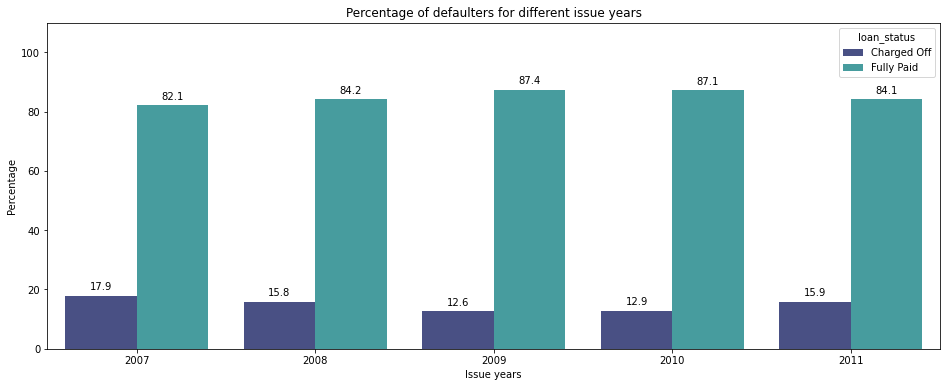

In [131]:
plt.figure(figsize=[16,6])
loan_issyr_pct_sns = sns.barplot(x='issue_year',y='percentage',data = loan_issyr_pct,hue='loan_status',palette='mako')
plt.title('Percentage of defaulters for different issue years')
plt.ylabel('Percentage')
plt.xlabel('Issue years')
plt.ylim(0,110)
for a in loan_issyr_pct_sns.patches:
    loan_issyr_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

This shows that in the year 2007, the highest default was witnessed. The lowest was on 2009

In [132]:
# Let's find the relation between the home ownership and the default rates
loan_home = loan.groupby(['home_ownership', 'loan_status'])['id'].agg('count')
loan_home_pct = loan_home.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index(name='percentage')

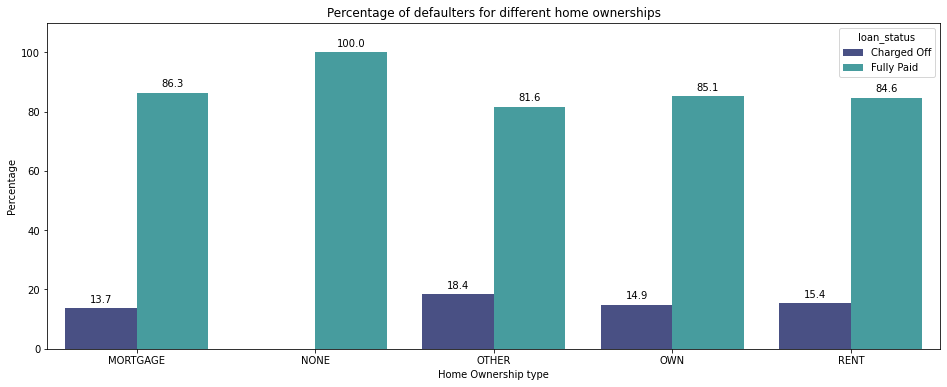

In [133]:
plt.figure(figsize=[16,6])
loan_home_pct_sns = sns.barplot(x='home_ownership',y='percentage',data = loan_home_pct,hue='loan_status',palette='mako')
plt.title('Percentage of defaulters for different home ownerships')
plt.ylabel('Percentage')
plt.xlabel('Home Ownership type')
plt.ylim(0,110)
for a in loan_home_pct_sns.patches:
    loan_home_pct_sns.annotate(format(a.get_height(), '.1f'), 
                   (a.get_x() + a.get_width() / 2., a.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()